# Foreword

For the purpose of Data Science Special Syllabus Report, I am going to use the data from Robot Field for the year 2020. Following is a summary of the field and the dates when the data was collected from the field.


Date of data collections  
Subvplots in the field  
Distribution of dates in the season  
Days to heading  
Days to maturity  
Sowing dates  

# Preprocessing

In [2]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import math
import os
import datetime
from copy import copy
import pprint # pretty print
import time

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To display df nicely in loops
from IPython.display import display 
# display(df1.head()) 
# display(df2.head())

# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',50)

In [3]:
# Prints the current workinig directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\Documents\\GitHub\\vPheno\\DS Special Syllabus Report\\Code'

## Importing Data

In [4]:
path = './Data/'
list_data = os.listdir(path)
os.listdir(path)

['raw',
 'Robot_2020_mean_fixed_rows.csv',
 'Robot_2020_median_fixed_rows.csv',
 'Robot_2020_stdev_fixed_rows.csv',
 'Robot_fixed_cols.csv']

In [5]:
import_data = []
for csv_data in tqdm(list_data, desc="hello", unit="files"):
    if os.path.isfile(os.path.join(path, csv_data)):
        df_name = csv_data[:-4]
        import_data.append(df_name)

        locals()[df_name] = pd.read_csv(path+csv_data)
        print(df_name, '=====', locals()[df_name].shape)
    

hello: 100%|██████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 119.36files/s]

Robot_2020_mean_fixed_rows ===== (96, 114)
Robot_2020_median_fixed_rows ===== (96, 114)
Robot_2020_stdev_fixed_rows ===== (96, 114)
Robot_fixed_cols ===== (1344, 29)


## Dropping Mean and Std_Dev columns

In [6]:
columns_all = Robot_fixed_cols.columns
mean_cols = columns_all[columns_all.str.contains(pat='Mean', case=False)]
std_cols = columns_all[columns_all.str.contains(pat='Std_Dev', case=False)]

Robot_fixed_cols.drop(columns=mean_cols, inplace=True)
Robot_fixed_cols.drop(columns=std_cols, inplace=True)

Robot_fixed_cols

,Plot_ID,Blue_Median_Value,Green_Median_Value,Red_Median_Value,RedEdge_Median_Value,NIR_Median_Value,NDVI_Median_Value,MTCI_Median_Value,EVI_Median_Value,GrainYield,Days2Heading,Days2Maturity,Date
0,1101,0.021905,0.051635,0.028147,0.142298,0.465755,0.885390,2.803551,-1.261239,453.658537,62,109,2020-07-01
1,1102,0.028108,0.055910,0.035009,0.145149,0.458687,0.858816,2.861652,-1.100831,439.024390,62,113,2020-07-01
2,1103,0.026808,0.057188,0.034401,0.149912,0.468715,0.863303,2.768063,-1.156627,409.756098,60,106,2020-07-01
3,1104,0.024750,0.048598,0.030623,0.131659,0.455760,0.874434,3.206094,-1.163352,474.796748,61,110,2020-07-01
4,1105,0.029282,0.059577,0.035984,0.153574,0.473269,0.858489,2.720606,-1.136098,411.382114,61,106,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,1808,0.033788,0.062602,0.084690,0.153530,0.250196,0.490993,1.428498,-0.273772,429.268293,61,105,2020-07-30
1340,1809,0.025289,0.053867,0.065721,0.147120,0.267604,0.601344,1.501041,-0.383402,414.634146,60,102,2020-07-30
1341,1810,0.034920,0.067794,0.076857,0.162150,0.280264,0.569404,1.406162,-0.352456,460.162602,62,107,2020-07-30
1342,1811,0.032249,0.059999,0.080487,0.146993,0.236998,0.487644,1.384678,-0.262991,443.902439,62,105,2020-07-30


In [7]:
# Initializing the comments to be appended to results
comments = []
comments.append('Median columns only')
comments.append('EVI included.')

## Range of value for each band

In [9]:
Robot_fixed_cols.columns

Index(['Plot_ID', 'Blue_Median_Value', 'Green_Median_Value',
       'Red_Median_Value', 'RedEdge_Median_Value', 'NIR_Median_Value',
       'NDVI_Median_Value', 'MTCI_Median_Value', 'EVI_Median_Value',
       'GrainYield', 'Days2Heading', 'Days2Maturity', 'Date'],
      dtype='object')

In [19]:
Robot_fixed_cols.EVI_Median_Value.min()

-3.276678257143192

# Data Trends Visualisation

# TODO: Correlation heatmap of indices with target

## ToDo: Identify Dates and index with problems

## Take average or delete dates with problems, out of trend

### Ecxclude the problematic data/dates
or
### Take average values where the problematic data is

Cleanup  
Remove dates which have drop  

## ToDo: Remove outliers

# Model Training

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline




In [47]:
df = Robot_fixed_cols.copy()
comments.append('Robot_fixed_cols dataset.')
comments.append(str(Robot_fixed_cols.shape))
comments.append('All data stacked on top of each other.')
df.head()

,Plot_ID,Blue_Median_Value,Green_Median_Value,Red_Median_Value,RedEdge_Median_Value,NIR_Median_Value,NDVI_Median_Value,MTCI_Median_Value,EVI_Median_Value,GrainYield,Days2Heading,Days2Maturity,Date
0,1101,0.021905,0.051635,0.028147,0.142298,0.465755,0.885390,2.803551,-1.261239,453.658537,62,109,2020-07-01
1,1102,0.028108,0.055910,0.035009,0.145149,0.458687,0.858816,2.861652,-1.100831,439.024390,62,113,2020-07-01
2,1103,0.026808,0.057188,0.034401,0.149912,0.468715,0.863303,2.768063,-1.156627,409.756098,60,106,2020-07-01
3,1104,0.024750,0.048598,0.030623,0.131659,0.455760,0.874434,3.206094,-1.163352,474.796748,61,110,2020-07-01
4,1105,0.029282,0.059577,0.035984,0.153574,0.473269,0.858489,2.720606,-1.136098,411.382114,61,106,2020-07-01


In [48]:
# ToDo: Add check for duplicate columns in the df

# list_agg_df
yield_cols = ['GrainYield', 'Days2Heading', 'Days2Maturity']
id_cols_new = ['Plot_ID']

# Counter for location of column in columns list
loc = 0

# Dict for saving the name and location of the yield column
loc_yield_cols = {}

for cols in df.columns.tolist():
    for y_col in yield_cols:
        if not cols.find(y_col):
            loc_yield_cols[cols] = loc
            print(f'\"{cols}\" column in df seems like the yield column as it contains the text \"{y_col}\". It is located at location {loc}')
    loc += 1

yield_cols_found = list(loc_yield_cols.keys())
target_cols=yield_cols_found[0]

# # Droping yield columns, i.e. target variables and Plot_ID column
# Robot_2020_all.drop(columns = yield_cols_found+id_cols_new)
# Robot_2020_all[yield_cols_found]




"GrainYield" column in df seems like the yield column as it contains the text "GrainYield". It is located at location 9
"Days2Heading" column in df seems like the yield column as it contains the text "Days2Heading". It is located at location 10
"Days2Maturity" column in df seems like the yield column as it contains the text "Days2Maturity". It is located at location 11


In [49]:
%time

#==============================================================================
# Split dataframe into data and target
#==============================================================================

temp_X = df.drop(columns = yield_cols_found)
y = df[target_cols]
# y = df[target_cols].values.flatten()
comments.append('Drop Days2Heading and Days2Maturity features.')
comments.append('GrainYield Target.')

Wall time: 0 ns


# Converting dates to ordinal

In [50]:
temp_X
temp_X.info()
print('The entries in Date column are objects, instead of datetime object. We need to convert them.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Plot_ID               1344 non-null   int64  
 1   Blue_Median_Value     1344 non-null   float64
 2   Green_Median_Value    1344 non-null   float64
 3   Red_Median_Value      1344 non-null   float64
 4   RedEdge_Median_Value  1344 non-null   float64
 5   NIR_Median_Value      1344 non-null   float64
 6   NDVI_Median_Value     1344 non-null   float64
 7   MTCI_Median_Value     1344 non-null   float64
 8   EVI_Median_Value      1344 non-null   float64
 9   Date                  1344 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 105.1+ KB
The entries in Date column are objects, instead of datetime object. We need to convert them.


In [51]:
# Converting dates to datetime objects in pandas
temp_X['Date'] = pd.to_datetime(temp_X['Date'])
temp2_X = temp_X.copy()

temp_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plot_ID               1344 non-null   int64         
 1   Blue_Median_Value     1344 non-null   float64       
 2   Green_Median_Value    1344 non-null   float64       
 3   Red_Median_Value      1344 non-null   float64       
 4   RedEdge_Median_Value  1344 non-null   float64       
 5   NIR_Median_Value      1344 non-null   float64       
 6   NDVI_Median_Value     1344 non-null   float64       
 7   MTCI_Median_Value     1344 non-null   float64       
 8   EVI_Median_Value      1344 non-null   float64       
 9   Date                  1344 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 105.1 KB


In [52]:
X = temp_X.copy()
X['Date'] = temp2_X['Date'].apply(dt.toordinal)
X.drop(columns=['Plot_ID'], inplace=True)

In [28]:
%time

#==============================================================================
# Defining the function to vaiidate the model with the test data and 
# get the results from regression evaluation metrices in sklearn
#==============================================================================
pred = []
acc = []
def test_data_regression(model):
    pred = []
    accuracy = {}
    #==============================================================================
    # Make predictions for test set
    #==============================================================================

    # Predict classes for samples in test set
    y_pred = model.predict(X_test)
    
    features = X.columns
    importances = model.feature_importances_
    
    #==============================================================================
    # Compute performance
    #==============================================================================
    
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred, squared=True)
    print(mse, ' mean_squared_error')
#     accuracy.append(rmse)
    accuracy['MSE'] = mse
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(rmse, ' root_mean_squared_error')
#     accuracy.append(rmse)
    accuracy['RMSE'] = rmse

    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)
    print(r2, ' r2_score')
    accuracy['R2 Score'] = r2

    acc.append(accuracy)
    # Print accuracy computed from predictions on the test set
    pp = pprint.PrettyPrinter(indent=4, width=80, depth=None, stream=None, compact=True, sort_dicts=False)
    pp.pprint(accuracy)
    
    #==============================================================================
    # Append Results
    #==============================================================================
    results = []
    import datetime
    datetime = datetime.datetime.now()
    results.append(np.concatenate((np.array((model, mse, rmse, r2, accuracy, datetime, features, importances), dtype=object), np.array(comments))))
#     results.extend(np.array(comments)) 
    print(results)
    pd.DataFrame(np.asarray(results)).to_csv('results.csv',
                                             mode='a',
                                             header=None)
    pred.extend(y_pred)

Wall time: 0 ns


# Grid and Random Search

## Grid search functions

In [29]:
def grid(Xtrain,
         ytrain,
         estimator,
         params_grid,
         scores,
         cvs,
         cores,
         verb):

    t1 = time.time()

    gs = GridSearchCV(estimator=estimator,
                      param_grid=params_grid,
                      scoring=scores,
                      cv=cvs,
                      n_jobs=cores,
                      verbose=verb)

    gs = gs.fit(Xtrain, ytrain)
    print(gs.best_score_)
    print(gs.best_params_)
    
    t2 = time.time()

    # Saving results to csv file
    results = []
    import datetime
    datetime = datetime.datetime.now()

    results.append(np.concatenate((np.array((gs.best_estimator_, gs, score, gs.best_score_, gs.best_params_, 
                             (t2 - t1) / 60, datetime), dtype=object), np.array(comments))))

    pd.DataFrame(np.asarray(results)).to_csv('results.csv',
                                             mode='a',
                                             header=None)

    print('Total time: ', (t2 - t1) / 60, 'minutes')

# General Variables declarations

In [30]:

import time, datetime
from datetime import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')

comments.append('Test train split. test_Size=0.3, random_state=55')
cv = 10
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']



# Using on stacked dates data

Wall time: 0 ns
4655.863348382419  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.863348382419,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382419, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.863348382419, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 4, 30, 18, 16, 20, 980180),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.04809253, 0.05005271, 0.05955119, 0.06745321, 0.09835265,
       0.15457141, 0.31552747, 0.06280945, 0.14358939]),
       'Median columns only', 'EVI included.',
       'Robot_fix

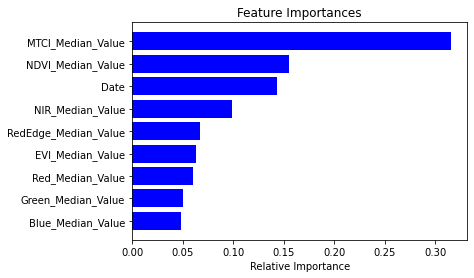

8435.038480100948  mean_squared_error
91.84246555978856  root_mean_squared_error
0.2195215527627179  r2_score
{   'MSE': 8435.038480100948,
    'RMSE': 91.84246555978856,
    'R2 Score': 0.2195215527627179}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100948, 91.84246555978856, 0.2195215527627179,
       {'MSE': 8435.038480100948, 'RMSE': 91.84246555978856, 'R2 Score': 0.2195215527627179},
       datetime.datetime(2021, 4, 30, 18, 16, 21, 237973),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.

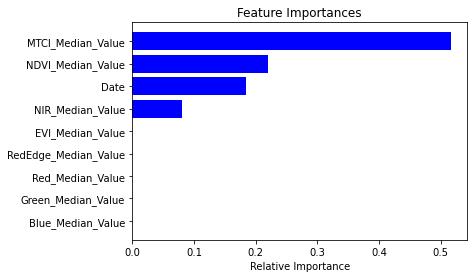

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done  90 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    5.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.08871639569600423 minutes
neg_mean_absolute_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.025185356171
{'model__alpha': 9.0, 'model__solver': 'sag'}
Total time:  0.0323172648747762 minutes
neg_mean_squared_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19776719606791665
{'model__alpha': 9.0, 'model__solver': 'sag'}
Total time:  0.028069984912872315 minutes
r2 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   14.4s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   22.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.9s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   43.3s
[Parallel(n_jobs=6)]: Done 17244 tasks      | elapsed:   58.3s
[Parallel(n_jobs=6)]: Done 22140 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 27612 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 33660 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.9min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  1.93664999405543 minutes
neg_mean_absolute_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.7s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   14.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   22.4s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   32.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   43.5s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   56.9s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.9min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.9105285167694093 minutes
neg_mean_squared_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.7s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   14.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   22.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   32.9s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   44.5s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   58.0s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  2.0346337000528973 minutes
r2 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   19.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   52.7s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.5mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  6.610880474249522 minutes
neg_mean_absolute_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   33.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   45.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   57.5s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  7.01788903872172 minutes
neg_mean_squared_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    7.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   17.4s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   26.4s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   37.6s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   48.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.9mi

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  7.064652438958486 minutes
r2 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007233874003092448 minutes
neg_mean_absolute_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007960081100463867 minutes
neg_mean_squared_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.008273784319559734 minutes
r2 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   16.4s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   18.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.31486608982086184 minutes
neg_mean_absolute_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   10.1s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   17.8s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   20.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.34385043382644653 minutes
neg_mean_squared_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   17.7s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   19.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.3344901442527771 minutes
r2 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.9s finished


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.066502845287323 minutes
neg_mean_absolute_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06649566491444905 minutes
neg_mean_squared_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.9s finished


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06679856777191162 minutes
r2 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.8s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   17.0s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   26.2s
[Parallel(n_jobs=6)]: Done 1362 tasks      | elapsed:   39.6s
[Parallel(n_jobs=6)]: Done 1596 tasks      | elapsed:   50.0s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.0min finished


-72.12948483414793
{'model__loss': 'absolute_loss', 'model__max_trials': 401, 'model__min_samples': 90.0}
Total time:  1.0402675072352092 minutes
neg_mean_absolute_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.8s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.6s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   25.7s
[Parallel(n_jobs=6)]: Done 1362 tasks      | elapsed:   38.8s
[Parallel(n_jobs=6)]: Done 1596 tasks      | elapsed:   49.3s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.0min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8259.023872876129
{'model__loss': 'absolute_loss', 'model__max_trials': 151, 'model__min_samples': 90.0}
Total time:  1.028891877333323 minutes
neg_mean_squared_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.7s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.5s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   25.7s
[Parallel(n_jobs=6)]: Done 1362 tasks      | elapsed:   39.1s
[Parallel(n_jobs=6)]: Done 1596 tasks      | elapsed:   49.6s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.0min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18172640412093144
{'model__loss': 'absolute_loss', 'model__max_trials': 1, 'model__min_samples': 70.0}
Total time:  1.0322572668393453 minutes
r2 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   11.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.18743942975997924 minutes
neg_mean_absolute_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   11.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.18711945215861003 minutes
neg_mean_squared_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   11.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.18774778842926027 minutes
r2 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   17.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   26.8s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   35.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   45.9s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   57.1s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.7mi

-68.33808687386274
{'model__max_depth': 46, 'model__max_features': 6, 'model__min_samples_leaf': 46, 'model__min_samples_split': 26}
Total time:  9.956352829933167 minutes
neg_mean_absolute_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   11.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   19.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.4s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   54.5s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7641.182169773676
{'model__max_depth': None, 'model__max_features': 6, 'model__min_samples_leaf': 36, 'model__min_samples_split': 46}
Total time:  12.120757826169331 minutes
neg_mean_squared_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   26.6s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   44.2s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   52.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 29928 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 32640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 38256 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 45612 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 53556 tasks      | elaps

0.17258450006936704
{'model__max_depth': 6, 'model__max_features': 3, 'model__min_samples_leaf': 16, 'model__min_samples_split': 6}
Total time:  12.251536297798157 minutes
r2 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    1.9s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.05667672554651896 minutes
neg_mean_absolute_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 154 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    4.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.07152916193008423 minutes
neg_mean_squared_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    1.9s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.057279574871063235 minutes
r2 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 204 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1644 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done 3660 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 6252 tasks      | elapsed:   27.7s
[Parallel(n_jobs=6)]: Done 9420 tasks      | elapsed:   37.2s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   46.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.7830875476201375 minutes
neg_mean_absolute_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   14.0s
[Parallel(n_jobs=6)]: Done 5664 tasks      | elapsed:   30.7s
[Parallel(n_jobs=6)]: Done 8508 tasks      | elapsed:   38.9s
[Parallel(n_jobs=6)]: Done 12252 tasks      | elapsed:   49.7s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   51.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.8566683689753215 minutes
neg_mean_squared_error 2020-07-01T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    6.7s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   30.3s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   46.7s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   59.7s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:  1.2min finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  1.172979712486267 minutes
r2 2020-07-01T00:00:00.000000000
Total time:  68.97841439644496 minutes
4655.863348382419  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.863348382419,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382419, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.863348382419, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 4, 30, 19, 25, 19, 656816),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Da

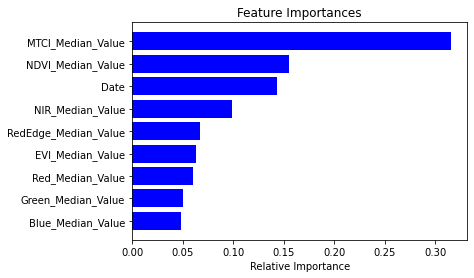

8435.038480100948  mean_squared_error
91.84246555978856  root_mean_squared_error
0.219521552762718  r2_score
{   'MSE': 8435.038480100948,
    'RMSE': 91.84246555978856,
    'R2 Score': 0.219521552762718}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100948, 91.84246555978856, 0.219521552762718,
       {'MSE': 8435.038480100948, 'RMSE': 91.84246555978856, 'R2 Score': 0.219521552762718},
       datetime.datetime(2021, 4, 30, 19, 25, 19, 895781),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.', '

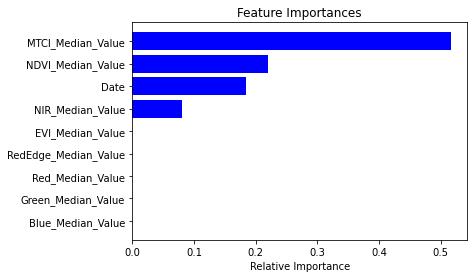

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.031977991263071694 minutes
neg_mean_absolute_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.197632721492
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.026164011160532633 minutes
neg_mean_squared_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19763943809814272
{'model__alpha': 9.0, 'model__solver': 'sag'}
Total time:  0.026142628987630208 minutes
r2 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.7s
[Parallel(n_jobs=6)]: Done 6168 tasks      | elapsed:   31.8s
[Parallel(n_jobs=6)]: Done 8844 tasks      | elapsed:   38.4s
[Parallel(n_jobs=6)]: Done 12588 tasks      | elapsed:   48.2s
[Parallel(n_jobs=6)]: Done 16908 tasks      | elapsed:   59.9s
[Parallel(n_jobs=6)]: Done 20136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 21504 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 23016 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 26160 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 33360 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.4min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  2.3731574694315594 minutes
neg_mean_absolute_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 870 tasks      | elapsed:    5.8s
[Parallel(n_jobs=6)]: Done 1878 tasks      | elapsed:   15.8s
[Parallel(n_jobs=6)]: Done 3174 tasks      | elapsed:   22.7s
[Parallel(n_jobs=6)]: Done 4758 tasks      | elapsed:   27.1s
[Parallel(n_jobs=6)]: Done 6630 tasks      | elapsed:   32.1s
[Parallel(n_jobs=6)]: Done 8790 tasks      | elapsed:   37.9s
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:   44.6s
[Parallel(n_jobs=6)]: Done 13974 tasks      | elapsed:   54.6s
[Parallel(n_jobs=6)]: Done 16998 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 20310 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 23910 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 27798 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 31974 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.8min f

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  2.781028151512146 minutes
neg_mean_squared_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   11.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   18.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   27.7s
[Parallel(n_jobs=6)]: Done 12660 tasks      | elapsed:   48.4s
[Parallel(n_jobs=6)]: Done 16656 tasks      | elapsed:   58.5s
[Parallel(n_jobs=6)]: Done 21552 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 27024 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 33072 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  2.1246188124020895 minutes
r2 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.9s
[Parallel(n_jobs=6)]: Done 10392 tasks      | elapsed:   39.9s
[Parallel(n_jobs=6)]: Done 10932 tasks      | elapsed:   48.1s
[Parallel(n_jobs=6)]: Done 11544 tasks      | elapsed:   58.8s
[Parallel(n_jobs=6)]: Done 14004 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 20052 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 26676 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 33876 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 41652 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 50004 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 58932 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 68436 tasks      | elapsed:  3.6mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  8.527634199460348 minutes
neg_mean_absolute_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 204 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 1644 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 3660 tasks      | elapsed:    7.7s
[Parallel(n_jobs=6)]: Done 6252 tasks      | elapsed:   13.2s
[Parallel(n_jobs=6)]: Done 9420 tasks      | elapsed:   20.3s
[Parallel(n_jobs=6)]: Done 13164 tasks      | elapsed:   33.4s
[Parallel(n_jobs=6)]: Done 15696 tasks      | elapsed:   52.4s
[Parallel(n_jobs=6)]: Done 18144 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 21648 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 27696 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 33576 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 40776 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 48552 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 56328 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  8.322049339612326 minutes
neg_mean_squared_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    7.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   13.0s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   19.7s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   28.3s
[Parallel(n_jobs=6)]: Done 17400 tasks      | elapsed:   50.1s
[Parallel(n_jobs=6)]: Done 21468 tasks      | elapsed:   58.5s
[Parallel(n_jobs=6)]: Done 26940 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 32988 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 39612 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 46812 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 54588 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 62940 tasks      | elaps

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  7.778746898969015 minutes
r2 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.008638938268025717 minutes
neg_mean_absolute_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007629553476969401 minutes
neg_mean_squared_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007794225215911865 minutes
r2 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   26.8s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   30.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.5093649744987487 minutes
neg_mean_absolute_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    7.2s
[Parallel(n_jobs=6)]: Done 4500 tasks      | elapsed:   12.2s
[Parallel(n_jobs=6)]: Done 7293 tasks      | elapsed:   18.1s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   18.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.3055878520011902 minutes
neg_mean_squared_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.2853286027908325 minutes
r2 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    5.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.08840155998865763 minutes
neg_mean_absolute_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    9.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.1536099672317505 minutes
neg_mean_squared_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    7.7s
[Parallel(n_jobs=6)]: Done 1039 out of 1050 | elapsed:   14.8s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:   14.9s finished


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.250659704208374 minutes
r2 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 324 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 450 tasks      | elapsed:   23.3s
[Parallel(n_jobs=6)]: Done 612 tasks      | elapsed:   29.1s
[Parallel(n_jobs=6)]: Done 810 tasks      | elapsed:   39.6s
[Parallel(n_jobs=6)]: Done 1428 tasks      | elapsed:   55.4s
[Parallel(n_jobs=6)]: Done 1698 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.4min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-69.41598417090957
{'model__loss': 'absolute_loss', 'model__max_trials': 1, 'model__min_samples': 60.0}
Total time:  1.3850792288780212 minutes
neg_mean_absolute_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 576 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done 702 tasks      | elapsed:   17.1s
[Parallel(n_jobs=6)]: Done 864 tasks      | elapsed:   32.9s
[Parallel(n_jobs=6)]: Done 1278 tasks      | elapsed:   48.5s
[Parallel(n_jobs=6)]: Done 1512 tasks      | elapsed:   58.1s
[Parallel(n_jobs=6)]: Done 1782 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.2min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7756.611962374557
{'model__loss': 'squared_loss', 'model__max_trials': 251, 'model__min_samples': 90.0}
Total time:  1.2201283733050028 minutes
neg_mean_squared_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.7s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   17.8s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   32.9s
[Parallel(n_jobs=6)]: Done 1320 tasks      | elapsed:   48.8s
[Parallel(n_jobs=6)]: Done 1554 tasks      | elapsed:   57.0s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.2min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.16639388798929128
{'model__loss': 'absolute_loss', 'model__max_trials': 101, 'model__min_samples': 80.0}
Total time:  1.1615889151891072 minutes
r2 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   12.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.20866163969039916 minutes
neg_mean_absolute_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 108 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 288 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 864 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done 1260 tasks      | elapsed:   20.2s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   21.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.36321439743041994 minutes
neg_mean_squared_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 108 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 288 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    6.7s
[Parallel(n_jobs=6)]: Done 1092 tasks      | elapsed:   10.4s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   11.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.20127458175023397 minutes
r2 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    7.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.8s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   38.1s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 39948 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 47148 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 54924 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 63276 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 71208 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 80712 tasks      | elapsed:  4.6mi

-68.46677676226612
{'model__max_depth': 66, 'model__max_features': 5, 'model__min_samples_leaf': 26, 'model__min_samples_split': 21}
Total time:  12.18913780450821 minutes
neg_mean_absolute_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    7.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   13.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.5s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.5s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   50.9s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 32616 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 34272 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 37200 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 43680 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 51288 tasks      | elaps

-8019.472206454966
{'model__max_depth': 6, 'model__max_features': 7, 'model__min_samples_leaf': 16, 'model__min_samples_split': 41}
Total time:  11.838737610975901 minutes
neg_mean_squared_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   15.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   24.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   33.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.4s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   49.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 43080 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 45024 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 52488 tasks      | elaps

0.19123791346177563
{'model__max_depth': 31, 'model__max_features': 6, 'model__min_samples_leaf': 46, 'model__min_samples_split': 11}
Total time:  12.200013434886932 minutes
r2 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.059014769395192464 minutes
neg_mean_absolute_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.0687556783358256 minutes
neg_mean_squared_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.0688329299290975 minutes
r2 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   16.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   39.4s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   48.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.8106684883435568 minutes
neg_mean_absolute_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    6.7s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   13.7s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   24.9s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   36.9s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   45.3s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   52.1s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   56.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.9377424836158752 minutes
neg_mean_squared_error 2020-08-04T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.8s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.0s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   25.5s
[Parallel(n_jobs=6)]: Done 7236 tasks      | elapsed:   36.7s
[Parallel(n_jobs=6)]: Done 7704 tasks      | elapsed:   42.7s
[Parallel(n_jobs=6)]: Done 8244 tasks      | elapsed:   49.7s
[Parallel(n_jobs=6)]: Done 8856 tasks      | elapsed:   57.6s
[Parallel(n_jobs=6)]: Done 9540 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:  1.2min finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  1.2473849614461263 minutes
r2 2020-08-04T00:00:00.000000000
Total time:  77.61648731231689 minutes
4655.863348382419  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.863348382419,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382419, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.863348382419, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 4, 30, 20, 42, 56, 633618),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'D

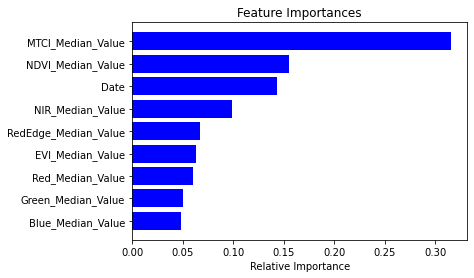

8435.038480100946  mean_squared_error
91.84246555978855  root_mean_squared_error
0.21952155276271812  r2_score
{   'MSE': 8435.038480100946,
    'RMSE': 91.84246555978855,
    'R2 Score': 0.21952155276271812}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100946, 91.84246555978855, 0.21952155276271812,
       {'MSE': 8435.038480100946, 'RMSE': 91.84246555978855, 'R2 Score': 0.21952155276271812},
       datetime.datetime(2021, 4, 30, 20, 42, 56, 866870),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols data

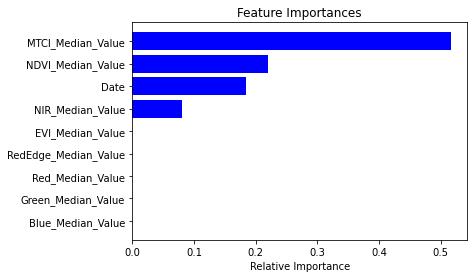

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.026531851291656493 minutes
neg_mean_absolute_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.197632721492
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.025266488393147785 minutes
neg_mean_squared_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19758783442087818
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.026180748144785562 minutes
r2 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   23.6s
[Parallel(n_jobs=6)]: Done 8424 tasks      | elapsed:   37.4s
[Parallel(n_jobs=6)]: Done 12168 tasks      | elapsed:   46.8s
[Parallel(n_jobs=6)]: Done 16488 tasks      | elapsed:   58.3s
[Parallel(n_jobs=6)]: Done 21384 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 26856 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 32904 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.1min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  2.1316155989964805 minutes
neg_mean_absolute_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   23.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   40.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   55.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 27108 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 33156 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.4min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  2.3735045830408734 minutes
neg_mean_squared_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 204 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 924 tasks      | elapsed:    7.3s
[Parallel(n_jobs=6)]: Done 1932 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 3228 tasks      | elapsed:   21.9s
[Parallel(n_jobs=6)]: Done 4812 tasks      | elapsed:   27.3s
[Parallel(n_jobs=6)]: Done 6684 tasks      | elapsed:   32.0s
[Parallel(n_jobs=6)]: Done 8844 tasks      | elapsed:   37.7s
[Parallel(n_jobs=6)]: Done 11292 tasks      | elapsed:   44.2s
[Parallel(n_jobs=6)]: Done 14028 tasks      | elapsed:   51.7s
[Parallel(n_jobs=6)]: Done 17052 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 20364 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 23964 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 27852 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 32028 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.4min f

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  2.3782660166422525 minutes
r2 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    6.3s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   14.0s
[Parallel(n_jobs=6)]: Done 4548 tasks      | elapsed:   19.0s
[Parallel(n_jobs=6)]: Done 7716 tasks      | elapsed:   25.5s
[Parallel(n_jobs=6)]: Done 11460 tasks      | elapsed:   33.7s
[Parallel(n_jobs=6)]: Done 15780 tasks      | elapsed:   44.9s
[Parallel(n_jobs=6)]: Done 20676 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 26148 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 32196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 38820 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 46020 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 53796 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 62148 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 70500 tasks      | elapsed:  3.6min
[

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  7.737073040008545 minutes
neg_mean_absolute_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 204 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1644 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 3660 tasks      | elapsed:    8.2s
[Parallel(n_jobs=6)]: Done 6252 tasks      | elapsed:   14.0s
[Parallel(n_jobs=6)]: Done 9420 tasks      | elapsed:   23.2s
[Parallel(n_jobs=6)]: Done 13164 tasks      | elapsed:   38.2s
[Parallel(n_jobs=6)]: Done 17484 tasks      | elapsed:   47.8s
[Parallel(n_jobs=6)]: Done 22380 tasks      | elapsed:   58.1s
[Parallel(n_jobs=6)]: Done 27852 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 33900 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 40524 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 47724 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 55500 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 63852 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  7.537331902980805 minutes
neg_mean_squared_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 204 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1644 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3660 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 6252 tasks      | elapsed:   21.8s
[Parallel(n_jobs=6)]: Done 9420 tasks      | elapsed:   36.0s
[Parallel(n_jobs=6)]: Done 13164 tasks      | elapsed:   45.7s
[Parallel(n_jobs=6)]: Done 17484 tasks      | elapsed:   55.5s
[Parallel(n_jobs=6)]: Done 22380 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 27852 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 33900 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 40524 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 47724 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 54672 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 63024 tasks      | elaps

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  7.542489147186279 minutes
r2 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 156 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    1.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.021324336528778076 minutes
neg_mean_absolute_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 154 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.02487713893254598 minutes
neg_mean_squared_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    1.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.02134388287862142 minutes
r2 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 1092 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done 3684 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 6852 tasks      | elapsed:   21.7s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   22.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.3813142975171407 minutes
neg_mean_absolute_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.2960224270820618 minutes
neg_mean_squared_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   15.5s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   23.1s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   30.3s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   32.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.5433327992757161 minutes
r2 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.05296642780303955 minutes
neg_mean_absolute_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.053891626993815105 minutes
neg_mean_squared_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.05556057294209798 minutes
r2 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:    9.4s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   25.7s
[Parallel(n_jobs=6)]: Done 1212 tasks      | elapsed:   44.4s
[Parallel(n_jobs=6)]: Done 1446 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 1716 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.4min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-71.68395560441631
{'model__loss': 'absolute_loss', 'model__max_trials': 251, 'model__min_samples': 40.0}
Total time:  1.4064807573954263 minutes
neg_mean_absolute_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 204 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 546 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done 672 tasks      | elapsed:   15.5s
[Parallel(n_jobs=6)]: Done 834 tasks      | elapsed:   29.7s
[Parallel(n_jobs=6)]: Done 1458 tasks      | elapsed:   47.8s
[Parallel(n_jobs=6)]: Done 1692 tasks      | elapsed:   58.7s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.1min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8053.9505775878915
{'model__loss': 'absolute_loss', 'model__max_trials': 251, 'model__min_samples': 90.0}
Total time:  1.0997891068458556 minutes
neg_mean_squared_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 450 tasks      | elapsed:   11.9s
[Parallel(n_jobs=6)]: Done 576 tasks      | elapsed:   20.4s
[Parallel(n_jobs=6)]: Done 738 tasks      | elapsed:   27.0s
[Parallel(n_jobs=6)]: Done 966 tasks      | elapsed:   36.9s
[Parallel(n_jobs=6)]: Done 1554 tasks      | elapsed:   53.8s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.2min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1623454384122806
{'model__loss': 'squared_loss', 'model__max_trials': 251, 'model__min_samples': 70.0}
Total time:  1.2363013664881388 minutes
r2 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:    9.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.1527859926223755 minutes
neg_mean_absolute_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    7.4s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:    9.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.16342401504516602 minutes
neg_mean_squared_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.4s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.18230700095494587 minutes
r2 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   42.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.9s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.5mi

-68.31750348773235
{'model__max_depth': 46, 'model__max_features': 5, 'model__min_samples_leaf': 36, 'model__min_samples_split': 2}
Total time:  8.92678405046463 minutes
neg_mean_absolute_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 204 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1644 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 3660 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6252 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 9420 tasks      | elapsed:   24.5s
[Parallel(n_jobs=6)]: Done 13164 tasks      | elapsed:   32.5s
[Parallel(n_jobs=6)]: Done 17484 tasks      | elapsed:   41.8s
[Parallel(n_jobs=6)]: Done 22380 tasks      | elapsed:   52.7s
[Parallel(n_jobs=6)]: Done 27852 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 33900 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 40524 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 47724 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 55500 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 63852 tasks      | elaps

-7809.214247025497
{'model__max_depth': 61, 'model__max_features': 5, 'model__min_samples_leaf': 31, 'model__min_samples_split': 16}
Total time:  8.926116339365642 minutes
neg_mean_squared_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   42.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   53.3s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1970907770808104
{'model__max_depth': 26, 'model__max_features': 3, 'model__min_samples_leaf': 21, 'model__min_samples_split': 2}
Total time:  8.969487460454305 minutes
r2 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 204 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    4.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.07435854276021321 minutes
neg_mean_absolute_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06374509731928507 minutes
neg_mean_squared_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 154 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    4.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.07572897275288899 minutes
r2 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   11.0s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.5s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   38.0s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   42.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.7111818114916484 minutes
neg_mean_absolute_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    6.9s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   11.1s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.2s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.4s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   29.7s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   37.5s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   42.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.7030024766921997 minutes
neg_mean_squared_error 2020-07-07T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    7.3s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   11.6s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.6s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.9s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   38.0s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   42.6s finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.711646318435669 minutes
r2 2020-07-07T00:00:00.000000000
Total time:  64.67951312859853 minutes
4655.86334838242  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.86334838242,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.86334838242, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.86334838242, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 4, 30, 21, 47, 37, 609437),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date']

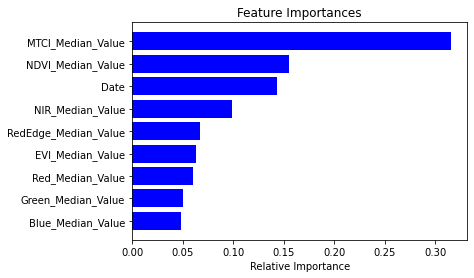

8435.038480100948  mean_squared_error
91.84246555978856  root_mean_squared_error
0.2195215527627179  r2_score
{   'MSE': 8435.038480100948,
    'RMSE': 91.84246555978856,
    'R2 Score': 0.2195215527627179}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100948, 91.84246555978856, 0.2195215527627179,
       {'MSE': 8435.038480100948, 'RMSE': 91.84246555978856, 'R2 Score': 0.2195215527627179},
       datetime.datetime(2021, 4, 30, 21, 47, 37, 866004),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.

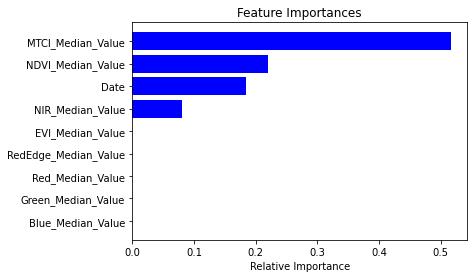

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 204 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.02990856170654297 minutes
neg_mean_absolute_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.197632721492
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.027734728654225667 minutes
neg_mean_squared_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19760965900414112
{'model__alpha': 8.0, 'model__solver': 'sag'}
Total time:  0.029141577084859212 minutes
r2 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.6s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.9s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   41.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   54.4s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  1.823474359512329 minutes
neg_mean_absolute_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.5s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.7s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   41.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   54.6s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.8277361710866293 minutes
neg_mean_squared_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.5s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   41.4s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   54.1s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.8223793069521586 minutes
r2 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   23.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.3s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   43.3s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   54.5s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.2mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  6.149122321605683 minutes
neg_mean_absolute_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 204 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1644 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3660 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 6252 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 9420 tasks      | elapsed:   22.5s
[Parallel(n_jobs=6)]: Done 13164 tasks      | elapsed:   31.6s
[Parallel(n_jobs=6)]: Done 17484 tasks      | elapsed:   42.8s
[Parallel(n_jobs=6)]: Done 22380 tasks      | elapsed:   54.6s
[Parallel(n_jobs=6)]: Done 27852 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 33900 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 40524 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47724 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55500 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 63852 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  6.156602501869202 minutes
neg_mean_squared_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.5s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   23.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.4s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   43.5s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   54.7s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  10.580936785538992 minutes
r2 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    1.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.024454017480214436 minutes
neg_mean_absolute_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    1.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.021801451841990154 minutes
neg_mean_squared_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    1.2s finished


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.021636911233266196 minutes
r2 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 1692 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 2484 tasks      | elapsed:   21.0s
[Parallel(n_jobs=6)]: Done 3420 tasks      | elapsed:   26.5s
[Parallel(n_jobs=6)]: Done 5364 tasks      | elapsed:   36.1s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   50.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.8391004125277202 minutes
neg_mean_absolute_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.3s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    8.4s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   20.6s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   41.9s
[Parallel(n_jobs=6)]: Done 7339 out of 7350 | elapsed:   45.9s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   46.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.7684775789578756 minutes
neg_mean_squared_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 2148 tasks      | elapsed:   12.8s
[Parallel(n_jobs=6)]: Done 3732 tasks      | elapsed:   20.3s
[Parallel(n_jobs=6)]: Done 5604 tasks      | elapsed:   32.2s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   41.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.6953010598818461 minutes
r2 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    7.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.12517873843510946 minutes
neg_mean_absolute_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    6.7s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    6.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.11771858930587768 minutes
neg_mean_squared_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:   11.4s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:   11.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.19986528158187866 minutes
r2 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 255 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 366 tasks      | elapsed:   10.4s
[Parallel(n_jobs=6)]: Done 492 tasks      | elapsed:   18.8s
[Parallel(n_jobs=6)]: Done 654 tasks      | elapsed:   30.2s
[Parallel(n_jobs=6)]: Done 852 tasks      | elapsed:   52.7s
[Parallel(n_jobs=6)]: Done 1332 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 1602 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.9min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.53202586358942
{'model__loss': 'squared_loss', 'model__max_trials': 1, 'model__min_samples': 70.0}
Total time:  1.9129552404085794 minutes
neg_mean_absolute_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done 408 tasks      | elapsed:   10.7s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   20.0s
[Parallel(n_jobs=6)]: Done 696 tasks      | elapsed:   33.1s
[Parallel(n_jobs=6)]: Done 894 tasks      | elapsed:   53.5s
[Parallel(n_jobs=6)]: Done 1356 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 1626 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  2.0min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-7895.841220131848
{'model__loss': 'absolute_loss', 'model__max_trials': 151, 'model__min_samples': 40.0}
Total time:  1.9763421575228373 minutes
neg_mean_squared_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 408 tasks      | elapsed:   11.8s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   18.4s
[Parallel(n_jobs=6)]: Done 696 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 894 tasks      | elapsed:   47.0s
[Parallel(n_jobs=6)]: Done 1428 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 1698 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.8min finished


0.19735977145287004
{'model__loss': 'squared_loss', 'model__max_trials': 301, 'model__min_samples': 80.0}
Total time:  1.7775915185610454 minutes
r2 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 108 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 288 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:   10.1s
[Parallel(n_jobs=6)]: Done 864 tasks      | elapsed:   16.0s
[Parallel(n_jobs=6)]: Done 1260 tasks      | elapsed:   22.6s
[Parallel(n_jobs=6)]: Done 1389 out of 1400 | elapsed:   24.6s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   24.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.41376814047495525 minutes
neg_mean_absolute_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 108 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 288 tasks      | elapsed:    5.7s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:   10.1s
[Parallel(n_jobs=6)]: Done 864 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 1260 tasks      | elapsed:   20.7s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   22.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.37217862606048585 minutes
neg_mean_squared_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 108 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 288 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 864 tasks      | elapsed:   13.8s
[Parallel(n_jobs=6)]: Done 1260 tasks      | elapsed:   19.2s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   20.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.34608203570048013 minutes
r2 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   13.8s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   21.4s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   30.6s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   42.5s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   53.1s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 17124 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 20436 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 24036 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 27924 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 36564 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 41316 tasks      | elapsed:  3.2min
[

-68.83512407341458
{'model__max_depth': 81, 'model__max_features': 6, 'model__min_samples_leaf': 36, 'model__min_samples_split': 31}
Total time:  22.833295822143555 minutes
neg_mean_absolute_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.3s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    9.3s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   17.6s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   28.4s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   40.0s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   53.9s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 17124 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 20436 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 24036 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 27924 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:

-7966.464265917226
{'model__max_depth': 11, 'model__max_features': 5, 'model__min_samples_leaf': 26, 'model__min_samples_split': 31}
Total time:  42.31618987719218 minutes
neg_mean_squared_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   22.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   35.7s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   46.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   59.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.20721180655481689
{'model__max_depth': 51, 'model__max_features': 4, 'model__min_samples_leaf': 46, 'model__min_samples_split': 6}
Total time:  14.689582065741222 minutes
r2 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    4.8s finished


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.08427584966023763 minutes
neg_mean_absolute_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    4.7s finished


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.08321579297383626 minutes
neg_mean_squared_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    4.8s finished


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.0848211129506429 minutes
r2 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   10.4s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   16.6s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   24.2s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   33.1s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   44.4s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   55.2s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:  1.0min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  1.0274640639623007 minutes
neg_mean_absolute_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   12.0s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   20.1s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   28.1s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   37.6s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   48.7s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   59.9s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:  1.1min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  1.1073072830835977 minutes
neg_mean_squared_error 2020-08-12T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   16.4s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   23.8s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   32.9s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   43.6s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   55.0s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:  1.0min finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  1.0272383213043212 minutes
r2 2020-08-12T00:00:00.000000000
Total time:  121.3681784749031 minutes
4655.863348382419  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.863348382419,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382419, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.863348382419, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 4, 30, 23, 49, 0, 663836),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Da

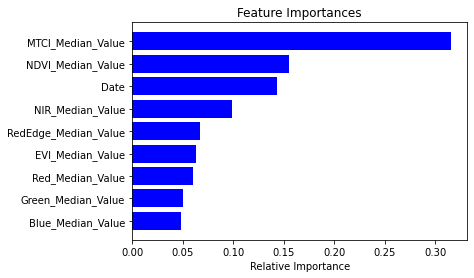

8435.038480100948  mean_squared_error
91.84246555978856  root_mean_squared_error
0.2195215527627179  r2_score
{   'MSE': 8435.038480100948,
    'RMSE': 91.84246555978856,
    'R2 Score': 0.2195215527627179}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100948, 91.84246555978856, 0.2195215527627179,
       {'MSE': 8435.038480100948, 'RMSE': 91.84246555978856, 'R2 Score': 0.2195215527627179},
       datetime.datetime(2021, 4, 30, 23, 49, 1, 64493),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.',

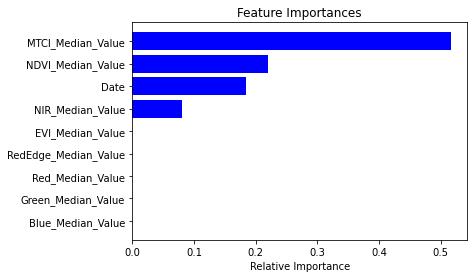

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    2.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.04284241596857707 minutes
neg_mean_absolute_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    2.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.197632721492
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.040620227654774986 minutes
neg_mean_squared_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    2.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19758783442087818
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.04184440771738688 minutes
r2 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    9.9s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   16.3s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   23.3s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   31.1s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   40.1s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   50.1s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 17124 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 20436 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 24036 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 27924 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 35809 out of 35820 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=6)]: Done 35820 out of 358

-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  2.5593006372451783 minutes
neg_mean_absolute_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   16.3s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   23.7s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   31.7s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   42.6s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   53.4s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 17124 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 20436 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 24036 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 27924 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  2.6052759289741516 minutes
neg_mean_squared_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   16.2s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   23.2s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   31.0s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   40.0s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   50.1s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 17124 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 20436 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 24036 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 27924 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\li

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  2.551321252187093 minutes
r2 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.1s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   32.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   46.4s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  4.6mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  8.75881270567576 minutes
neg_mean_absolute_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.5s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   32.3s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   45.6s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  4.5mi

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  8.935079499085743 minutes
neg_mean_squared_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.6s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   32.7s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   45.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  4.3mi

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  7.560839482148489 minutes
r2 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007905371983846029 minutes
neg_mean_absolute_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.008307111263275147 minutes
neg_mean_squared_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.008727510770161947 minutes
r2 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   10.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   17.2s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   19.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.32347460587819415 minutes
neg_mean_absolute_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.5s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   11.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   18.9s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   21.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.3556827267011007 minutes
neg_mean_squared_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   10.1s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   16.6s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   19.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.32242271900177 minutes
r2 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    4.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06855776707331339 minutes
neg_mean_absolute_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06680006186167399 minutes
neg_mean_squared_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.9s finished


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06650054454803467 minutes
r2 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done 492 tasks      | elapsed:   10.4s
[Parallel(n_jobs=6)]: Done 618 tasks      | elapsed:   16.7s
[Parallel(n_jobs=6)]: Done 780 tasks      | elapsed:   31.1s
[Parallel(n_jobs=6)]: Done 1194 tasks      | elapsed:   50.1s
[Parallel(n_jobs=6)]: Done 1470 tasks      | elapsed:   59.9s
[Parallel(n_jobs=6)]: Done 1740 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.3min finished


-71.66907191672486
{'model__loss': 'squared_loss', 'model__max_trials': 401, 'model__min_samples': 90.0}
Total time:  1.2998803456624348 minutes
neg_mean_absolute_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 492 tasks      | elapsed:   13.6s
[Parallel(n_jobs=6)]: Done 618 tasks      | elapsed:   25.2s
[Parallel(n_jobs=6)]: Done 780 tasks      | elapsed:   32.9s
[Parallel(n_jobs=6)]: Done 1194 tasks      | elapsed:   43.8s
[Parallel(n_jobs=6)]: Done 1554 tasks      | elapsed:   57.4s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.2min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8256.795165375328
{'model__loss': 'absolute_loss', 'model__max_trials': 201, 'model__min_samples': 80.0}
Total time:  1.2094467878341675 minutes
neg_mean_squared_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    6.6s
[Parallel(n_jobs=6)]: Done 408 tasks      | elapsed:   16.6s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   26.2s
[Parallel(n_jobs=6)]: Done 696 tasks      | elapsed:   34.9s
[Parallel(n_jobs=6)]: Done 894 tasks      | elapsed:   46.2s
[Parallel(n_jobs=6)]: Done 1512 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 1782 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.4min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.16574900369702802
{'model__loss': 'absolute_loss', 'model__max_trials': 1, 'model__min_samples': 90.0}
Total time:  1.442003575960795 minutes
r2 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 144 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 504 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 1008 tasks      | elapsed:    7.8s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17534091472625732 minutes
neg_mean_absolute_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.18457003434499106 minutes
neg_mean_squared_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:   11.8s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   15.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.26404737631479896 minutes
r2 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   22.2s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   27.1s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   33.1s
[Parallel(n_jobs=6)]: Done 14916 tasks      | elapsed:   46.2s
[Parallel(n_jobs=6)]: Done 21180 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 22398 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 26184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 33384 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 39324 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 47676 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 52500 tasks      | elapsed:  3.5min
[Pa

-69.28400775471015
{'model__max_depth': 61, 'model__max_features': 4, 'model__min_samples_leaf': 41, 'model__min_samples_split': 21}
Total time:  13.788615032037098 minutes
neg_mean_absolute_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   14.4s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   22.5s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   33.3s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   45.8s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   58.0s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 17124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 20436 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 24036 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 27924 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:

-8016.135818036612
{'model__max_depth': 6, 'model__max_features': 7, 'model__min_samples_leaf': 36, 'model__min_samples_split': 6}
Total time:  16.836624610424042 minutes
neg_mean_squared_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    7.9s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   13.2s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   20.3s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   29.4s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   40.5s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   50.9s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 17124 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 20436 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 24036 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 27924 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:

0.19279656823696303
{'model__max_depth': 46, 'model__max_features': 3, 'model__min_samples_leaf': 31, 'model__min_samples_split': 41}
Total time:  16.2666636745135 minutes
r2 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 154 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    8.0s finished


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.1457887013753255 minutes
neg_mean_absolute_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 154 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    7.4s finished


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.1325277845064799 minutes
neg_mean_squared_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 154 tasks      | elapsed:    2.3s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    7.5s finished


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.13187784751256307 minutes
r2 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   11.8s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   18.9s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   27.5s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   38.9s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   51.8s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:  1.2min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  1.2124186595280966 minutes
neg_mean_absolute_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   11.5s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   18.4s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   26.8s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   38.4s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   52.4s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:  1.3min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  1.2962741017341615 minutes
neg_mean_squared_error 2020-07-13T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   13.5s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   22.9s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   33.9s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   44.6s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   56.3s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:  1.3min finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  1.2988333582878113 minutes
r2 2020-07-13T00:00:00.000000000
Total time:  90.08340722322464 minutes
4655.863348382419  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.863348382419,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382419, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.863348382419, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 5, 1, 1, 19, 9, 582423),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date

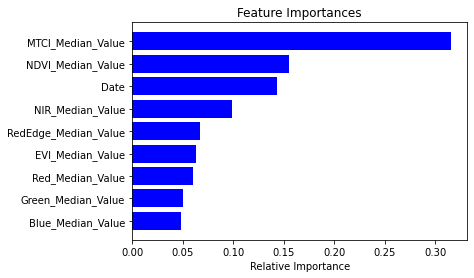

8435.038480100946  mean_squared_error
91.84246555978855  root_mean_squared_error
0.21952155276271812  r2_score
{   'MSE': 8435.038480100946,
    'RMSE': 91.84246555978855,
    'R2 Score': 0.21952155276271812}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100946, 91.84246555978855, 0.21952155276271812,
       {'MSE': 8435.038480100946, 'RMSE': 91.84246555978855, 'R2 Score': 0.21952155276271812},
       datetime.datetime(2021, 5, 1, 1, 19, 10, 591323),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols datase

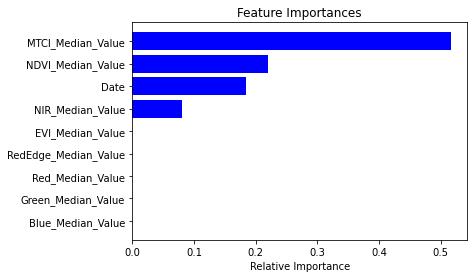

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 168 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 528 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    4.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.07327563365300496 minutes
neg_mean_absolute_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    4.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.197632721492
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.07330316702524821 minutes
neg_mean_squared_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    4.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19758783442087818
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.07547016143798828 minutes
r2 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.4s
[Parallel(n_jobs=6)]: Done 1692 tasks      | elapsed:   12.6s
[Parallel(n_jobs=6)]: Done 2484 tasks      | elapsed:   17.5s
[Parallel(n_jobs=6)]: Done 3420 tasks      | elapsed:   23.5s
[Parallel(n_jobs=6)]: Done 4500 tasks      | elapsed:   29.5s
[Parallel(n_jobs=6)]: Done 5724 tasks      | elapsed:   35.6s
[Parallel(n_jobs=6)]: Done 7092 tasks      | elapsed:   42.8s
[Parallel(n_jobs=6)]: Done 8604 tasks      | elapsed:   53.4s
[Parallel(n_jobs=6)]: Done 10260 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 13620 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 17508 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 21684 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 26148 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 30900 tasks      | elapsed:  2.8min
[Par

-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  3.2186260779698688 minutes
neg_mean_absolute_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   11.0s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   18.4s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   26.5s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   35.4s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   45.5s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   57.0s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 17124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 20436 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 24036 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 27924 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  3.0120298981666567 minutes
neg_mean_squared_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   12.1s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   19.7s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   27.8s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   36.9s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   47.3s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   59.5s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 17124 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 20436 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 24036 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 27924 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  3.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\li

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  3.0318851033846537 minutes
r2 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    8.2s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   19.9s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   27.2s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   36.2s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   48.2s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 17124 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 20436 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 24036 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 27924 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 36564 tasks      | elapsed:  2.6min
[Pa

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  10.124932273228962 minutes
neg_mean_absolute_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   22.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   33.8s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   46.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  4.3mi

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  7.545810910065969 minutes
neg_mean_squared_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   16.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   25.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   34.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   46.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   58.7s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  6.602949889500936 minutes
r2 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.01044999361038208 minutes
neg_mean_absolute_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.012887823581695556 minutes
neg_mean_squared_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.010765282313028972 minutes
r2 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   10.6s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   15.7s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.4s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   24.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.4047108292579651 minutes
neg_mean_absolute_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   18.3s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   21.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.35156136751174927 minutes
neg_mean_squared_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    7.8s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   19.9s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   22.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.37448280652364097 minutes
r2 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    4.1s finished


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.07096005280812581 minutes
neg_mean_absolute_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    4.1s finished


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.07058694760004679 minutes
neg_mean_squared_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    4.0s finished


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06862919727961223 minutes
r2 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 492 tasks      | elapsed:   10.0s
[Parallel(n_jobs=6)]: Done 618 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done 780 tasks      | elapsed:   24.7s
[Parallel(n_jobs=6)]: Done 1236 tasks      | elapsed:   39.1s
[Parallel(n_jobs=6)]: Done 1512 tasks      | elapsed:   49.3s
[Parallel(n_jobs=6)]: Done 1782 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.1min finished


-72.08650399066882
{'model__loss': 'absolute_loss', 'model__max_trials': 451, 'model__min_samples': 60.0}
Total time:  1.120053772131602 minutes
neg_mean_absolute_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 492 tasks      | elapsed:   10.7s
[Parallel(n_jobs=6)]: Done 618 tasks      | elapsed:   16.5s
[Parallel(n_jobs=6)]: Done 780 tasks      | elapsed:   27.1s
[Parallel(n_jobs=6)]: Done 1236 tasks      | elapsed:   42.0s
[Parallel(n_jobs=6)]: Done 1554 tasks      | elapsed:   53.9s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.1min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8162.502460394224
{'model__loss': 'squared_loss', 'model__max_trials': 151, 'model__min_samples': 50.0}
Total time:  1.151604708035787 minutes
neg_mean_squared_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done 492 tasks      | elapsed:    9.5s
[Parallel(n_jobs=6)]: Done 618 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 780 tasks      | elapsed:   24.4s
[Parallel(n_jobs=6)]: Done 1278 tasks      | elapsed:   38.5s
[Parallel(n_jobs=6)]: Done 1554 tasks      | elapsed:   49.0s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.1min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.16352451261799336
{'model__loss': 'absolute_loss', 'model__max_trials': 151, 'model__min_samples': 70.0}
Total time:  1.0682494997978211 minutes
r2 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   11.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.1905928055445353 minutes
neg_mean_absolute_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    9.1s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   11.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.19738192558288575 minutes
neg_mean_squared_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   11.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.19334659179051716 minutes
r2 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   17.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   27.3s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   35.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   46.5s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   59.5s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.4min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.9mi

-67.99087199589277
{'model__max_depth': 26, 'model__max_features': 5, 'model__min_samples_leaf': 21, 'model__min_samples_split': 11}
Total time:  9.860382374127706 minutes
neg_mean_absolute_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   17.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   27.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   35.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   45.6s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   59.5s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-8210.964076372487
{'model__max_depth': 96, 'model__max_features': 4, 'model__min_samples_leaf': 11, 'model__min_samples_split': 36}
Total time:  11.418134800593059 minutes
neg_mean_squared_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.1s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   50.4s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34500 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 45720 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 54000 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 62424 tasks      | elapsed:  3.4min
[Parallel(n_jobs=6)]: Done 65160 tasks      | elaps

0.1789093525590425
{'model__max_depth': 41, 'model__max_features': 5, 'model__min_samples_leaf': 46, 'model__min_samples_split': 46}
Total time:  11.610269916057586 minutes
r2 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 154 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    6.6s finished


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.1169395923614502 minutes
neg_mean_absolute_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    5.0s finished


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.0896861990292867 minutes
neg_mean_squared_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06905064582824708 minutes
r2 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   10.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   18.3s
[Parallel(n_jobs=6)]: Done 8664 tasks      | elapsed:   37.9s
[Parallel(n_jobs=6)]: Done 11748 tasks      | elapsed:   46.1s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   48.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.8167306105295817 minutes
neg_mean_absolute_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   11.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.1s
[Parallel(n_jobs=6)]: Done 8676 tasks      | elapsed:   39.0s
[Parallel(n_jobs=6)]: Done 12420 tasks      | elapsed:   49.1s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   50.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.8382173975308737 minutes
neg_mean_squared_error 2020-06-18T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   10.8s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   25.4s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   40.6s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   51.8s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   55.5s finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.9272571245829264 minutes
r2 2020-06-18T00:00:00.000000000
Total time:  74.9576276699702 minutes
4655.863348382419  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.863348382419,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382419, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.863348382419, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 5, 1, 2, 34, 1, 933844),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'

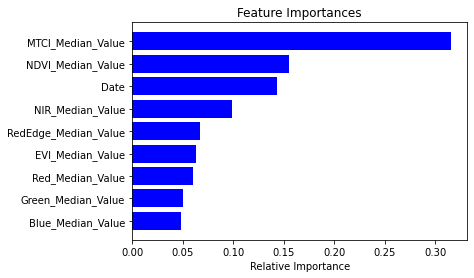

8435.038480100948  mean_squared_error
91.84246555978856  root_mean_squared_error
0.219521552762718  r2_score
{   'MSE': 8435.038480100948,
    'RMSE': 91.84246555978856,
    'R2 Score': 0.219521552762718}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100948, 91.84246555978856, 0.219521552762718,
       {'MSE': 8435.038480100948, 'RMSE': 91.84246555978856, 'R2 Score': 0.219521552762718},
       datetime.datetime(2021, 5, 1, 2, 34, 2, 218901),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.', '(13

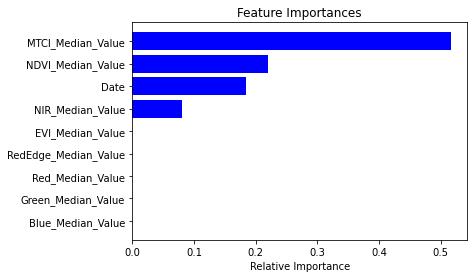

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.023546727498372395 minutes
neg_mean_absolute_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.197632721492
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.024286119143168132 minutes
neg_mean_squared_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19776808479642566
{'model__alpha': 8.0, 'model__solver': 'sag'}
Total time:  0.024684639771779378 minutes
r2 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.8s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   19.8s
[Parallel(n_jobs=6)]: Done 9084 tasks      | elapsed:   38.5s
[Parallel(n_jobs=6)]: Done 9552 tasks      | elapsed:   43.1s
[Parallel(n_jobs=6)]: Done 10092 tasks      | elapsed:   48.3s
[Parallel(n_jobs=6)]: Done 10704 tasks      | elapsed:   54.6s
[Parallel(n_jobs=6)]: Done 11388 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12324 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 18900 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 26100 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 32880 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.4min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks   

-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  2.366155691941579 minutes
neg_mean_absolute_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   17.0s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   32.4s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   43.7s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   52.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  2.310329802831014 minutes
neg_mean_squared_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   25.7s
[Parallel(n_jobs=6)]: Done 8676 tasks      | elapsed:   37.1s
[Parallel(n_jobs=6)]: Done 12420 tasks      | elapsed:   46.3s
[Parallel(n_jobs=6)]: Done 16740 tasks      | elapsed:   57.8s
[Parallel(n_jobs=6)]: Done 21636 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 27108 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 33156 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  2.080471909046173 minutes
r2 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   16.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   36.5s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   54.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  4.3mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  7.839744563897451 minutes
neg_mean_absolute_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   25.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.9s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   39.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   49.9s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  7.569438326358795 minutes
neg_mean_squared_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:   16.0s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   25.4s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   36.9s
[Parallel(n_jobs=6)]: Done 8340 tasks      | elapsed:   43.6s
[Parallel(n_jobs=6)]: Done 12660 tasks      | elapsed:   52.2s
[Parallel(n_jobs=6)]: Done 17556 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 23028 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 29076 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 35700 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 42900 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 50676 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 59028 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 67956 tasks      | elapsed:  3.6min
[P

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  7.552504710356394 minutes
r2 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.00718080202738444 minutes
neg_mean_absolute_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.008228011926015218 minutes
neg_mean_squared_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.008560438950856527 minutes
r2 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   11.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   18.3s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   21.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.3541363040606181 minutes
neg_mean_absolute_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    6.9s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.3s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   22.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.37219122648239134 minutes
neg_mean_squared_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.29427964687347413 minutes
r2 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06533414920171102 minutes
neg_mean_absolute_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.9s finished


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06674874623616536 minutes
neg_mean_squared_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.062084702650705974 minutes
r2 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.4s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.0s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 1397 tasks      | elapsed:   38.8s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.4s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-71.64013077488798
{'model__loss': 'squared_loss', 'model__max_trials': 151, 'model__min_samples': 80.0}
Total time:  0.99202880859375 minutes
neg_mean_absolute_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   15.9s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   38.8s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.7s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.5s finished


-8161.382216998629
{'model__loss': 'squared_loss', 'model__max_trials': 401, 'model__min_samples': 90.0}
Total time:  0.9978638410568237 minutes
neg_mean_squared_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 358 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done 474 tasks      | elapsed:    8.4s
[Parallel(n_jobs=6)]: Done 600 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 762 tasks      | elapsed:   21.5s
[Parallel(n_jobs=6)]: Done 1134 tasks      | elapsed:   32.1s
[Parallel(n_jobs=6)]: Done 1578 tasks      | elapsed:   46.7s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1854741997208877
{'model__loss': 'absolute_loss', 'model__max_trials': 251, 'model__min_samples': 40.0}
Total time:  0.9964844584465027 minutes
r2 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.3s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17765698035558064 minutes
neg_mean_absolute_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.1s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.1738286058108012 minutes
neg_mean_squared_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.0s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17433590094248455 minutes
r2 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.0s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.2s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.4mi

-69.65158436158119
{'model__max_depth': 56, 'model__max_features': 5, 'model__min_samples_leaf': 21, 'model__min_samples_split': 26}
Total time:  10.314280386765798 minutes
neg_mean_absolute_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    7.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.0s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   29.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   39.3s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   46.9s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   56.3s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 52176 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 58416 tasks      | elaps

-7906.528604942971
{'model__max_depth': 21, 'model__max_features': 4, 'model__min_samples_leaf': 31, 'model__min_samples_split': 6}
Total time:  11.49086111386617 minutes
neg_mean_squared_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    7.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   13.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   21.6s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.6s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   58.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 39696 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 46896 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 54672 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 63024 tasks      | elaps

0.16006709919705386
{'model__max_depth': 26, 'model__max_features': 4, 'model__min_samples_leaf': 36, 'model__min_samples_split': 2}
Total time:  11.500939083099365 minutes
r2 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 238 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06081180572509766 minutes
neg_mean_absolute_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    5.0s finished


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.09011452198028565 minutes
neg_mean_squared_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 154 tasks      | elapsed:    2.4s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    9.1s finished


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.16134562889734905 minutes
r2 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 588 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 2604 tasks      | elapsed:   11.8s
[Parallel(n_jobs=6)]: Done 5196 tasks      | elapsed:   19.0s
[Parallel(n_jobs=6)]: Done 8364 tasks      | elapsed:   28.5s
[Parallel(n_jobs=6)]: Done 12108 tasks      | elapsed:   42.8s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   46.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.7822897990544637 minutes
neg_mean_absolute_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.4s
[Parallel(n_jobs=6)]: Done 1692 tasks      | elapsed:   12.6s
[Parallel(n_jobs=6)]: Done 2484 tasks      | elapsed:   17.2s
[Parallel(n_jobs=6)]: Done 3420 tasks      | elapsed:   21.7s
[Parallel(n_jobs=6)]: Done 6924 tasks      | elapsed:   31.6s
[Parallel(n_jobs=6)]: Done 11820 tasks      | elapsed:   45.5s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   48.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.8055947899818421 minutes
neg_mean_squared_error 2020-07-20T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    8.2s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   15.7s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   27.2s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   41.3s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   55.5s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:  1.1min finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  1.0947134494781494 minutes
r2 2020-07-20T00:00:00.000000000
Total time:  70.89232085943222 minutes
4655.863348382418  mean_squared_error
68.23388709711925  root_mean_squared_error
0.5692016100143512  r2_score
{   'MSE': 4655.863348382418,
    'RMSE': 68.23388709711925,
    'R2 Score': 0.5692016100143512}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382418, 68.23388709711925, 0.5692016100143512,
       {'MSE': 4655.863348382418, 'RMSE': 68.23388709711925, 'R2 Score': 0.5692016100143512},
       datetime.datetime(2021, 5, 1, 3, 44, 55, 553182),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Dat

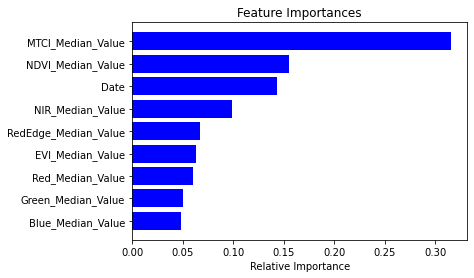

8435.038480100948  mean_squared_error
91.84246555978856  root_mean_squared_error
0.219521552762718  r2_score
{   'MSE': 8435.038480100948,
    'RMSE': 91.84246555978856,
    'R2 Score': 0.219521552762718}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100948, 91.84246555978856, 0.219521552762718,
       {'MSE': 8435.038480100948, 'RMSE': 91.84246555978856, 'R2 Score': 0.219521552762718},
       datetime.datetime(2021, 5, 1, 3, 44, 55, 817981),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.', '(1

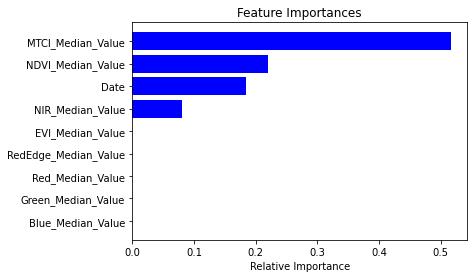

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.02505910793940226 minutes
neg_mean_absolute_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.197632721492
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.024599877993265788 minutes
neg_mean_squared_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19758783442087818
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.025183300177256267 minutes
r2 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.0s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   26.1s
[Parallel(n_jobs=6)]: Done 8844 tasks      | elapsed:   37.2s
[Parallel(n_jobs=6)]: Done 12588 tasks      | elapsed:   46.3s
[Parallel(n_jobs=6)]: Done 16908 tasks      | elapsed:   57.6s
[Parallel(n_jobs=6)]: Done 21804 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 27276 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 33324 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  2.0min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  1.9682188749313354 minutes
neg_mean_absolute_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   29.6s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.4s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   52.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.7746750235557556 minutes
neg_mean_squared_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.789163331190745 minutes
r2 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.1s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.9s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.6s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.1mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.924471588929494 minutes
neg_mean_absolute_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.5s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.920593555768331 minutes
neg_mean_squared_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   42.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   53.0s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.961203881104788 minutes
r2 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.006519599755605062 minutes
neg_mean_absolute_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007413295904795328 minutes
neg_mean_squared_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.0077459494272867834 minutes
r2 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.29048515955607096 minutes
neg_mean_absolute_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.287575356165568 minutes
neg_mean_squared_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.28814743359883627 minutes
r2 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.060892160733540854 minutes
neg_mean_absolute_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06196790933609009 minutes
neg_mean_squared_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06257548332214355 minutes
r2 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.6s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.2s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   25.0s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   39.0s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.7s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.3s finished


-71.65860405343668
{'model__loss': 'absolute_loss', 'model__max_trials': 451, 'model__min_samples': 80.0}
Total time:  0.993899420897166 minutes
neg_mean_absolute_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.9s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   39.1s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.8s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7909.889811935458
{'model__loss': 'squared_loss', 'model__max_trials': 1, 'model__min_samples': 90.0}
Total time:  0.9906744241714478 minutes
neg_mean_squared_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   15.9s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.9s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   38.9s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.6s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.3s finished


0.15724418247949562
{'model__loss': 'squared_loss', 'model__max_trials': 401, 'model__min_samples': 40.0}
Total time:  0.9931656281153362 minutes
r2 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.0s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17320592006047567 minutes
neg_mean_absolute_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.1s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17416181564331054 minutes
neg_mean_squared_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.4s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.1825969894727071 minutes
r2 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   17.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   27.6s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   37.1s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   48.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.5mi

-67.0276388926963
{'model__max_depth': 6, 'model__max_features': 6, 'model__min_samples_leaf': 6, 'model__min_samples_split': 31}
Total time:  8.877646660804748 minutes
neg_mean_absolute_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   25.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   33.3s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   42.0s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.3s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7890.714382599993
{'model__max_depth': 51, 'model__max_features': 6, 'model__min_samples_leaf': 36, 'model__min_samples_split': 36}
Total time:  8.699200061957042 minutes
neg_mean_squared_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.0s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.20623023957568698
{'model__max_depth': 6, 'model__max_features': 4, 'model__min_samples_leaf': 26, 'model__min_samples_split': 31}
Total time:  8.753507002194722 minutes
r2 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06186556418736776 minutes
neg_mean_absolute_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06306453943252563 minutes
neg_mean_squared_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 208 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06272836526234944 minutes
r2 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.4s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.6s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.0s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   40.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.6809900840123494 minutes
neg_mean_absolute_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    6.9s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.2s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.3s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   29.4s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   37.2s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.6959363063176472 minutes
neg_mean_squared_error 2020-07-22T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   11.1s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.2s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.3s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   29.5s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   37.3s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.7s finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.697998050848643 minutes
r2 2020-07-22T00:00:00.000000000
Total time:  56.635285540421805 minutes
4655.863348382421  mean_squared_error
68.23388709711928  root_mean_squared_error
0.569201610014351  r2_score
{   'MSE': 4655.863348382421,
    'RMSE': 68.23388709711928,
    'R2 Score': 0.569201610014351}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382421, 68.23388709711928, 0.569201610014351,
       {'MSE': 4655.863348382421, 'RMSE': 68.23388709711928, 'R2 Score': 0.569201610014351},
       datetime.datetime(2021, 5, 1, 4, 41, 33, 834173),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],

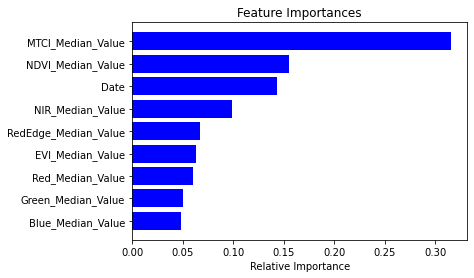

8435.038480100948  mean_squared_error
91.84246555978856  root_mean_squared_error
0.2195215527627179  r2_score
{   'MSE': 8435.038480100948,
    'RMSE': 91.84246555978856,
    'R2 Score': 0.2195215527627179}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100948, 91.84246555978856, 0.2195215527627179,
       {'MSE': 8435.038480100948, 'RMSE': 91.84246555978856, 'R2 Score': 0.2195215527627179},
       datetime.datetime(2021, 5, 1, 4, 41, 34, 71892),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.', 

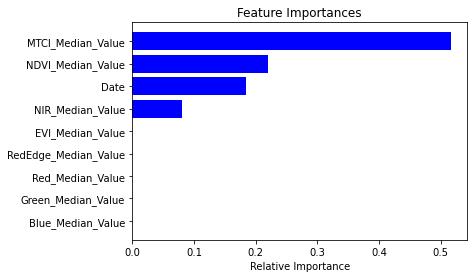

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.025856296221415203 minutes
neg_mean_absolute_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.197632721492
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.027963908513387044 minutes
neg_mean_squared_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19758783442087818
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.028258474667867024 minutes
r2 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   29.9s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.5s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  1.8068625370661417 minutes
neg_mean_absolute_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.5s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.7855814178784688 minutes
neg_mean_squared_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.7946078260739644 minutes
r2 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   21.9s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.5s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.3s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.1mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.9663147807121275 minutes
neg_mean_absolute_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   21.8s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   43.1s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   53.8s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  6.000736057758331 minutes
neg_mean_squared_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.6s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.6s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.997044102350871 minutes
r2 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.006509323914845784 minutes
neg_mean_absolute_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007396888732910156 minutes
neg_mean_squared_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.0071974078814188635 minutes
r2 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.2851745883623759 minutes
neg_mean_absolute_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.2935507893562317 minutes
neg_mean_squared_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.28583819468816124 minutes
r2 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06054730812708537 minutes
neg_mean_absolute_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06261423031489054 minutes
neg_mean_squared_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.061902189254760744 minutes
r2 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.5s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.0s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   39.1s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.9s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.7s finished


-72.70282647067185
{'model__loss': 'absolute_loss', 'model__max_trials': 401, 'model__min_samples': 30.0}
Total time:  1.000436047712962 minutes
neg_mean_absolute_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   15.9s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.7s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   39.0s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.7s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8080.701215240697
{'model__loss': 'absolute_loss', 'model__max_trials': 201, 'model__min_samples': 30.0}
Total time:  0.992880916595459 minutes
neg_mean_squared_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   15.9s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.7s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   38.6s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.7s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.6s finished


0.16766965092900735
{'model__loss': 'squared_loss', 'model__max_trials': 351, 'model__min_samples': 90.0}
Total time:  0.9982181827227274 minutes
r2 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   11.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.19853739738464354 minutes
neg_mean_absolute_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.2s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17725332578023276 minutes
neg_mean_squared_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.0s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17417864004770914 minutes
r2 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.4s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.0s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.3mi

-69.35362339376573
{'model__max_depth': 66, 'model__max_features': 3, 'model__min_samples_leaf': 41, 'model__min_samples_split': 41}
Total time:  8.715872923533121 minutes
neg_mean_absolute_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.3s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   50.9s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7628.880079297689
{'model__max_depth': 6, 'model__max_features': 5, 'model__min_samples_leaf': 16, 'model__min_samples_split': 21}
Total time:  8.701656444867451 minutes
neg_mean_squared_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.3s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.7s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.0s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.17031523479645316
{'model__max_depth': 46, 'model__max_features': 4, 'model__min_samples_leaf': 11, 'model__min_samples_split': 46}
Total time:  8.762329483032227 minutes
r2 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    1.9s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06199684540430705 minutes
neg_mean_absolute_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06404764652252197 minutes
neg_mean_squared_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06344045797983805 minutes
r2 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.5s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.6874877611796061 minutes
neg_mean_absolute_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.2s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   29.4s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   37.1s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.6962267597516377 minutes
neg_mean_squared_error 2020-06-23T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.0s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.1s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   29.3s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   36.9s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.4s finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.6934700806935629 minutes
r2 2020-06-23T00:00:00.000000000
Total time:  56.542161258061725 minutes
4655.863348382419  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.863348382419,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382419, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.863348382419, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 5, 1, 5, 38, 6, 350887),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Dat

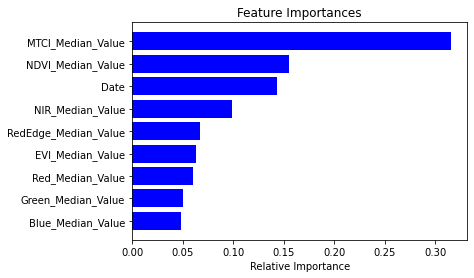

8435.038480100948  mean_squared_error
91.84246555978856  root_mean_squared_error
0.219521552762718  r2_score
{   'MSE': 8435.038480100948,
    'RMSE': 91.84246555978856,
    'R2 Score': 0.219521552762718}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100948, 91.84246555978856, 0.219521552762718,
       {'MSE': 8435.038480100948, 'RMSE': 91.84246555978856, 'R2 Score': 0.219521552762718},
       datetime.datetime(2021, 5, 1, 5, 38, 6, 591628),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.', '(13

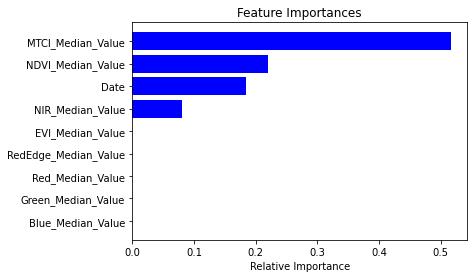

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.026091595490773518 minutes
neg_mean_absolute_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7837.96692531266
{'model__alpha': 8.0, 'model__solver': 'sag'}
Total time:  0.028958654403686522 minutes
neg_mean_squared_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19758783442087818
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.02819204330444336 minutes
r2 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.0s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.6s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  1.7810454845428467 minutes
neg_mean_absolute_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   42.1s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   54.6s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.808426566918691 minutes
neg_mean_squared_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   29.9s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.5s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.1s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.7867542306582134 minutes
r2 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.1s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.5s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.1mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.9227311929066975 minutes
neg_mean_absolute_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   21.8s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.4s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.1s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.9312029878298445 minutes
neg_mean_squared_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   21.9s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   42.4s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   54.0s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.9865511933962505 minutes
r2 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007662832736968994 minutes
neg_mean_absolute_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.008793528874715168 minutes
neg_mean_squared_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.009391530354817709 minutes
r2 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.28867119550704956 minutes
neg_mean_absolute_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.29473586479822794 minutes
neg_mean_squared_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.286024800936381 minutes
r2 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06076385974884033 minutes
neg_mean_absolute_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.062234171231587726 minutes
neg_mean_squared_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06216884851455688 minutes
r2 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.6s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   25.1s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   39.1s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.9s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-71.31614739623522
{'model__loss': 'squared_loss', 'model__max_trials': 1, 'model__min_samples': 90.0}
Total time:  0.9929633021354676 minutes
neg_mean_absolute_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    5.6s
[Parallel(n_jobs=6)]: Done 564 tasks      | elapsed:   11.8s
[Parallel(n_jobs=6)]: Done 690 tasks      | elapsed:   17.6s
[Parallel(n_jobs=6)]: Done 852 tasks      | elapsed:   26.7s
[Parallel(n_jobs=6)]: Done 1434 tasks      | elapsed:   40.0s
[Parallel(n_jobs=6)]: Done 1668 tasks      | elapsed:   51.3s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.1s finished


-8183.7229302391615
{'model__loss': 'absolute_loss', 'model__max_trials': 451, 'model__min_samples': 70.0}
Total time:  0.9909271160761516 minutes
neg_mean_squared_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.8s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.0s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.9s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   39.1s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.8s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.4s finished


0.1696192538997249
{'model__loss': 'squared_loss', 'model__max_trials': 351, 'model__min_samples': 90.0}
Total time:  0.994763724009196 minutes
r2 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.1s
[Parallel(n_jobs=6)]: Done 1389 out of 1400 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17624725103378297 minutes
neg_mean_absolute_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.0s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17638012965520222 minutes
neg_mean_squared_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.2s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17750216722488404 minutes
r2 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.3s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   42.0s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.1s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.4mi

-68.95134512721559
{'model__max_depth': 26, 'model__max_features': 5, 'model__min_samples_leaf': 21, 'model__min_samples_split': 41}
Total time:  8.733078050613404 minutes
neg_mean_absolute_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.6s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   50.7s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-8272.930266374877
{'model__max_depth': None, 'model__max_features': 4, 'model__min_samples_leaf': 41, 'model__min_samples_split': 41}
Total time:  8.703292020161946 minutes
neg_mean_squared_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.6s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   50.9s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.20528467660462874
{'model__max_depth': 11, 'model__max_features': 1, 'model__min_samples_leaf': 36, 'model__min_samples_split': 26}
Total time:  8.73195285797119 minutes
r2 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06249549388885498 minutes
neg_mean_absolute_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06435883442560832 minutes
neg_mean_squared_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06386258602142333 minutes
r2 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   32.2s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   42.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.7044445196787517 minutes
neg_mean_absolute_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.4s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.6870743632316589 minutes
neg_mean_squared_error 2020-06-24T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.0s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.2s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   29.3s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   37.2s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.6s finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.6962787826855977 minutes
r2 2020-06-24T00:00:00.000000000
Total time:  56.38676572640737 minutes
4655.863348382419  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.863348382419,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382419, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.863348382419, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 5, 1, 6, 34, 29, 645389),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Dat

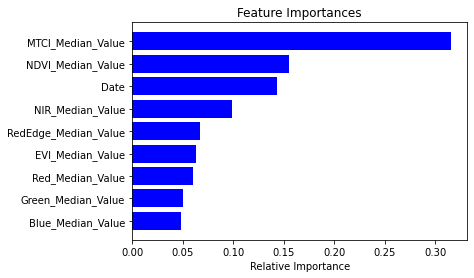

8435.038480100948  mean_squared_error
91.84246555978856  root_mean_squared_error
0.219521552762718  r2_score
{   'MSE': 8435.038480100948,
    'RMSE': 91.84246555978856,
    'R2 Score': 0.219521552762718}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100948, 91.84246555978856, 0.219521552762718,
       {'MSE': 8435.038480100948, 'RMSE': 91.84246555978856, 'R2 Score': 0.219521552762718},
       datetime.datetime(2021, 5, 1, 6, 34, 29, 894092),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.', '(1

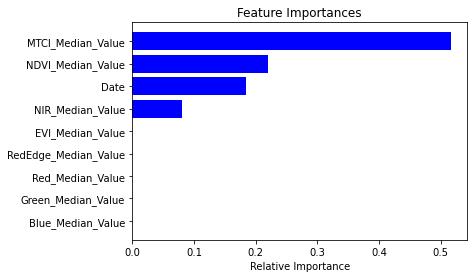

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.025937998294830324 minutes
neg_mean_absolute_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.197632721492
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.027710302670796712 minutes
neg_mean_squared_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19772088976487906
{'model__alpha': 7.0, 'model__solver': 'sag'}
Total time:  0.028324981530507404 minutes
r2 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.0s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.4s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  1.7819471915562948 minutes
neg_mean_absolute_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.4s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.8073137323061625 minutes
neg_mean_squared_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   29.9s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.5s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.7897048672040303 minutes
r2 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.5s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.2s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.1mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.92522941827774 minutes
neg_mean_absolute_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.5s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.946946875254313 minutes
neg_mean_squared_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.4s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.2s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.9s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.8s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.988945718606313 minutes
r2 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.006439002354939779 minutes
neg_mean_absolute_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.0072476824124654135 minutes
neg_mean_squared_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007679422696431478 minutes
r2 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.2865695238113403 minutes
neg_mean_absolute_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   16.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.2845235546429952 minutes
neg_mean_squared_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.2980637709299723 minutes
r2 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    4.0s finished


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.0688830296198527 minutes
neg_mean_absolute_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    4.1s finished


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06976379950841267 minutes
neg_mean_squared_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06588210264841715 minutes
r2 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.4s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   39.0s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.8s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.14229095543709
{'model__loss': 'squared_loss', 'model__max_trials': 51, 'model__min_samples': 80.0}
Total time:  0.9926765402158101 minutes
neg_mean_absolute_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done 564 tasks      | elapsed:   11.7s
[Parallel(n_jobs=6)]: Done 690 tasks      | elapsed:   17.5s
[Parallel(n_jobs=6)]: Done 852 tasks      | elapsed:   26.7s
[Parallel(n_jobs=6)]: Done 1434 tasks      | elapsed:   40.0s
[Parallel(n_jobs=6)]: Done 1668 tasks      | elapsed:   51.5s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.4s finished


-8202.732163944278
{'model__loss': 'absolute_loss', 'model__max_trials': 451, 'model__min_samples': 80.0}
Total time:  0.9958638707796733 minutes
neg_mean_squared_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.4s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.0s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   38.8s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.3s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.2266709261138245
{'model__loss': 'absolute_loss', 'model__max_trials': 1, 'model__min_samples': 70.0}
Total time:  0.9967618227005005 minutes
r2 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.6s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.18178458213806153 minutes
neg_mean_absolute_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.1s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17414131959279378 minutes
neg_mean_squared_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.0s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17383631467819213 minutes
r2 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.4s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.5s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.7s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.4mi

-67.22805736203561
{'model__max_depth': 11, 'model__max_features': 3, 'model__min_samples_leaf': 26, 'model__min_samples_split': 31}
Total time:  8.71224916378657 minutes
neg_mean_absolute_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.6s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.8s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7998.237084242693
{'model__max_depth': 81, 'model__max_features': 4, 'model__min_samples_leaf': 46, 'model__min_samples_split': 21}
Total time:  8.757050065199534 minutes
neg_mean_squared_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.1s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1580548502481997
{'model__max_depth': 76, 'model__max_features': 6, 'model__min_samples_leaf': 31, 'model__min_samples_split': 11}
Total time:  8.715546874205272 minutes
r2 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06309287150700887 minutes
neg_mean_absolute_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06314852237701415 minutes
neg_mean_squared_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06353513399759929 minutes
r2 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   11.1s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.3s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   29.6s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   37.2s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.6958616216977437 minutes
neg_mean_absolute_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.6s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.8s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   42.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.7031323989232381 minutes
neg_mean_squared_error 2020-06-25T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.6s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.8s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   30.0s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   37.7s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   42.1s finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.7047494689623515 minutes
r2 2020-06-25T00:00:00.000000000
Total time:  56.462968524297075 minutes
4655.863348382419  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.863348382419,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382419, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.863348382419, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 5, 1, 7, 30, 57, 443576),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Da

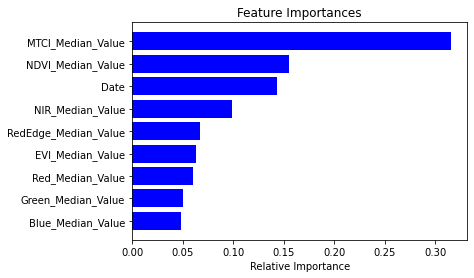

8435.038480100944  mean_squared_error
91.84246555978854  root_mean_squared_error
0.21952155276271823  r2_score
{   'MSE': 8435.038480100944,
    'RMSE': 91.84246555978854,
    'R2 Score': 0.21952155276271823}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100944, 91.84246555978854, 0.21952155276271823,
       {'MSE': 8435.038480100944, 'RMSE': 91.84246555978854, 'R2 Score': 0.21952155276271823},
       datetime.datetime(2021, 5, 1, 7, 30, 57, 685796),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols datase

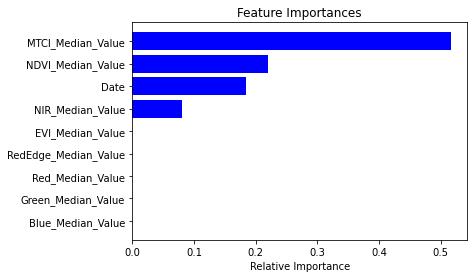

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.025738215446472167 minutes
neg_mean_absolute_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.197632721492
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.028740612665812175 minutes
neg_mean_squared_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19758783442087818
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.02826622724533081 minutes
r2 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.0s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  1.775889019171397 minutes
neg_mean_absolute_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.4s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.7757458964983621 minutes
neg_mean_squared_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.5s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.5s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   42.2s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   55.0s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.8158639073371887 minutes
r2 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   21.8s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.7s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   53.0s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.1mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.921671426296234 minutes
neg_mean_absolute_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.5s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.9474014163017275 minutes
neg_mean_squared_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   42.1s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.8s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.969322923819224 minutes
r2 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.006326742966969808 minutes
neg_mean_absolute_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007367666562398275 minutes
neg_mean_squared_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007747217019399007 minutes
r2 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.4s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.2938691059748332 minutes
neg_mean_absolute_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.28656277259190877 minutes
neg_mean_squared_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.1s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.2881959358851115 minutes
r2 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06085291306177775 minutes
neg_mean_absolute_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06137672662734985 minutes
neg_mean_squared_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06172467072804769 minutes
r2 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.5s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   25.0s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   39.0s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   50.6s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.0min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-71.1836785509607
{'model__loss': 'absolute_loss', 'model__max_trials': 251, 'model__min_samples': 50.0}
Total time:  1.019432298342387 minutes
neg_mean_absolute_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done 564 tasks      | elapsed:   11.5s
[Parallel(n_jobs=6)]: Done 690 tasks      | elapsed:   17.6s
[Parallel(n_jobs=6)]: Done 852 tasks      | elapsed:   26.8s
[Parallel(n_jobs=6)]: Done 1434 tasks      | elapsed:   40.3s
[Parallel(n_jobs=6)]: Done 1668 tasks      | elapsed:   51.6s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7741.811134389869
{'model__loss': 'absolute_loss', 'model__max_trials': 1, 'model__min_samples': 80.0}
Total time:  0.9927989482879639 minutes
neg_mean_squared_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.2s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   15.8s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.9s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   38.8s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.5s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.1s finished


0.1590767538013736
{'model__loss': 'squared_loss', 'model__max_trials': 351, 'model__min_samples': 80.0}
Total time:  0.9890767574310303 minutes
r2 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    7.9s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17185499668121337 minutes
neg_mean_absolute_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.0s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17337127526601157 minutes
neg_mean_squared_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.3s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17864342530568442 minutes
r2 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.5s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.3s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.4s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.4mi

-68.40174433195129
{'model__max_depth': 61, 'model__max_features': 6, 'model__min_samples_leaf': 31, 'model__min_samples_split': 11}
Total time:  8.726251145203909 minutes
neg_mean_absolute_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.4s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   50.6s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-8121.112750639839
{'model__max_depth': 91, 'model__max_features': 4, 'model__min_samples_leaf': 26, 'model__min_samples_split': 46}
Total time:  8.842729190985361 minutes
neg_mean_squared_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.3s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   33.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   42.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   53.1s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.14884473043504126
{'model__max_depth': 11, 'model__max_features': 5, 'model__min_samples_leaf': 36, 'model__min_samples_split': 21}
Total time:  8.777014410495758 minutes
r2 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.061413089434305825 minutes
neg_mean_absolute_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06390965779622396 minutes
neg_mean_squared_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06368508338928222 minutes
r2 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.5s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.9s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   40.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.6798710743586223 minutes
neg_mean_absolute_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.2s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.6853031635284423 minutes
neg_mean_squared_error 2020-07-27T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.2s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.3s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   29.5s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   37.7s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   42.6s finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.7138450304667155 minutes
r2 2020-07-27T00:00:00.000000000
Total time:  56.554531339804335 minutes
4655.863348382419  mean_squared_error
68.23388709711926  root_mean_squared_error
0.5692016100143511  r2_score
{   'MSE': 4655.863348382419,
    'RMSE': 68.23388709711926,
    'R2 Score': 0.5692016100143511}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382419, 68.23388709711926, 0.5692016100143511,
       {'MSE': 4655.863348382419, 'RMSE': 68.23388709711926, 'R2 Score': 0.5692016100143511},
       datetime.datetime(2021, 5, 1, 8, 27, 30, 879500),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Da

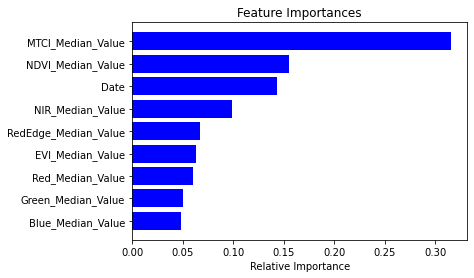

8435.038480100948  mean_squared_error
91.84246555978856  root_mean_squared_error
0.219521552762718  r2_score
{   'MSE': 8435.038480100948,
    'RMSE': 91.84246555978856,
    'R2 Score': 0.219521552762718}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100948, 91.84246555978856, 0.219521552762718,
       {'MSE': 8435.038480100948, 'RMSE': 91.84246555978856, 'R2 Score': 0.219521552762718},
       datetime.datetime(2021, 5, 1, 8, 27, 31, 150774),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.', '(1

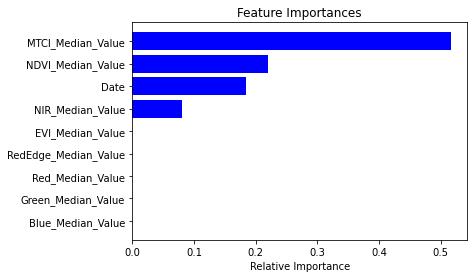

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.027859834829966228 minutes
neg_mean_absolute_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.19627035975
{'model__alpha': 9.0, 'model__solver': 'sag'}
Total time:  0.028025341033935548 minutes
neg_mean_squared_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976151222870605
{'model__alpha': 9.0, 'model__solver': 'sag'}
Total time:  0.028200427691141765 minutes
r2 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   29.9s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.5s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  1.7818877816200256 minutes
neg_mean_absolute_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.5s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.7s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   41.5s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   54.1s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.8151999831199646 minutes
neg_mean_squared_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.3s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   41.2s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.7s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.8225643277168273 minutes
r2 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.5s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   21.9s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   30.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.5s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.6s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.1mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.964109154542287 minutes
neg_mean_absolute_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.1s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.5s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.932350806395212 minutes
neg_mean_squared_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.7s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.5s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.995059792200724 minutes
r2 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007323129971822103 minutes
neg_mean_absolute_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.00814212958017985 minutes
neg_mean_squared_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007729383309682211 minutes
r2 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.29032465219497683 minutes
neg_mean_absolute_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.2886062502861023 minutes
neg_mean_squared_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.28501882155736286 minutes
r2 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06138964096705119 minutes
neg_mean_absolute_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.0626007596651713 minutes
neg_mean_squared_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06170699596405029 minutes
r2 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.5s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.9s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   39.2s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.9s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.16808307105353
{'model__loss': 'squared_loss', 'model__max_trials': 201, 'model__min_samples': 70.0}
Total time:  0.99964253505071 minutes
neg_mean_absolute_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   15.8s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.7s
[Parallel(n_jobs=6)]: Done 1362 tasks      | elapsed:   39.0s
[Parallel(n_jobs=6)]: Done 1596 tasks      | elapsed:   49.2s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.0min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7963.322110428444
{'model__loss': 'absolute_loss', 'model__max_trials': 151, 'model__min_samples': 50.0}
Total time:  1.0189843018849691 minutes
neg_mean_squared_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.8s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   15.8s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 1397 tasks      | elapsed:   38.8s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.7s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.21324795932513402
{'model__loss': 'squared_loss', 'model__max_trials': 1, 'model__min_samples': 90.0}
Total time:  0.9963894963264466 minutes
r2 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.0s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.172922945022583 minutes
neg_mean_absolute_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.0s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17360278367996215 minutes
neg_mean_squared_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.2s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.1759715755780538 minutes
r2 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.8s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   33.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.9s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.4mi

-68.90786929049223
{'model__max_depth': 31, 'model__max_features': 6, 'model__min_samples_leaf': 41, 'model__min_samples_split': 31}
Total time:  8.75834203561147 minutes
neg_mean_absolute_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.3s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.0s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.9s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.1s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-8088.230875844983
{'model__max_depth': 51, 'model__max_features': 5, 'model__min_samples_leaf': 21, 'model__min_samples_split': 36}
Total time:  8.724653017520904 minutes
neg_mean_squared_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.6s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.3s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   41.1s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.3s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1833127786764057
{'model__max_depth': 71, 'model__max_features': 4, 'model__min_samples_leaf': 46, 'model__min_samples_split': 31}
Total time:  8.805581363042196 minutes
r2 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06178020238876343 minutes
neg_mean_absolute_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06346895694732665 minutes
neg_mean_squared_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06287470658620199 minutes
r2 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   11.2s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.3s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.4s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   29.6s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   37.2s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.6953765789667765 minutes
neg_mean_absolute_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 2004 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   10.9s
[Parallel(n_jobs=6)]: Done 4884 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 6756 tasks      | elapsed:   22.3s
[Parallel(n_jobs=6)]: Done 8916 tasks      | elapsed:   30.0s
[Parallel(n_jobs=6)]: Done 11364 tasks      | elapsed:   37.7s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   42.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.7031215031941732 minutes
neg_mean_squared_error 2020-06-29T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.7s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.2s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.0s finished


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.6860550999641418 minutes
r2 2020-06-29T00:00:00.000000000
Total time:  56.62292892932892 minutes
4655.863348382421  mean_squared_error
68.23388709711928  root_mean_squared_error
0.569201610014351  r2_score
{   'MSE': 4655.863348382421,
    'RMSE': 68.23388709711928,
    'R2 Score': 0.569201610014351}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       4655.863348382421, 68.23388709711928, 0.569201610014351,
       {'MSE': 4655.863348382421, 'RMSE': 68.23388709711928, 'R2 Score': 0.569201610014351},
       datetime.datetime(2021, 5, 1, 9, 24, 8, 13088),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
 

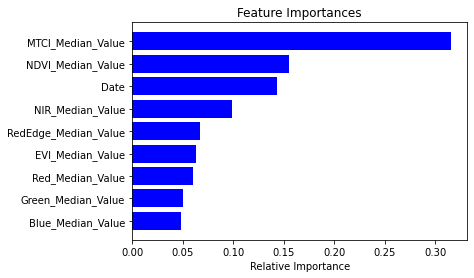

8435.038480100948  mean_squared_error
91.84246555978856  root_mean_squared_error
0.2195215527627179  r2_score
{   'MSE': 8435.038480100948,
    'RMSE': 91.84246555978856,
    'R2 Score': 0.2195215527627179}
[array([RandomForestRegressor(max_depth=100, min_samples_split=400, n_estimators=50,
                      n_jobs=-1, random_state=0),
       8435.038480100948, 91.84246555978856, 0.2195215527627179,
       {'MSE': 8435.038480100948, 'RMSE': 91.84246555978856, 'R2 Score': 0.2195215527627179},
       datetime.datetime(2021, 5, 1, 9, 24, 8, 265691),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.        , 0.        , 0.        , 0.        , 0.0797501 ,
       0.21929174, 0.51688576, 0.        , 0.1840724 ]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.', 

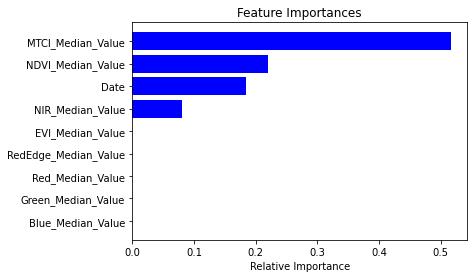

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.54716901289439
{'model__alpha': 8.0, 'model__solver': 'lsqr'}
Total time:  0.026737443606058755 minutes
neg_mean_absolute_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.197632721492
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.027601997057596844 minutes
neg_mean_squared_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed:    1.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19758783442087818
{'model__alpha': 9.0, 'model__solver': 'lsqr'}
Total time:  0.02829517920811971 minutes
r2 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   42.3s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   54.8s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.28553910699334
{'model__alpha': 0.6000000000000001, 'model__max_iter': 500, 'model__selection': 'cyclic'}
Total time:  1.810500431060791 minutes
neg_mean_absolute_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.2s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.3s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

-7775.23153548224
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.7831755717595419 minutes
neg_mean_squared_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 3582 candidates, totalling 35820 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   13.4s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   21.0s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   30.0s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   40.7s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   53.4s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 35820 out of 35820 | elapsed:  1.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1697.4309551399201, tolerance: 1353.5498711338741
  model = cd_fast.enet_coordinate_descent(
[Pa

0.20403079477494274
{'model__alpha': 0.6000000000000001, 'model__max_iter': 450, 'model__selection': 'cyclic'}
Total time:  1.7899993538856507 minutes
r2 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.4s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.3s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   43.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   53.9s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.1mi

-72.60479072504344
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.9741741935412085 minutes
neg_mean_absolute_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.3s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.3s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   42.2s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   53.6s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-7833.340897059408
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.959396990140279 minutes
neg_mean_squared_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 16119 candidates, totalling 161190 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.8s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   22.3s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.2s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   42.0s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.8s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1980848432895504
{'model__alpha': 0.1, 'model__l1_ratio': 0.9, 'model__max_iter': 150}
Total time:  5.997750190893809 minutes
r2 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.66422115015618
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.006370826562245687 minutes
neg_mean_absolute_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7923.387699745197
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007256162166595459 minutes
neg_mean_squared_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Done 132 out of 180 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.18896599759331661
{'model__fit_intercept': True, 'model__n_nonzero_coefs': 8}
Total time:  0.007386596997578939 minutes
r2 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.1s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-72.76952193341437
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.28952109813690186 minutes
neg_mean_absolute_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   14.9s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7908.374568518921
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.28552836974461876 minutes
neg_mean_squared_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.9s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.0s
[Parallel(n_jobs=6)]: Done 7350 out of 7350 | elapsed:   17.2s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.19057188798917615
{'model__alpha_1': 1.0, 'model__alpha_2': 1.0, 'model__lambda_1': 1.0, 'model__lambda_2': 1.0, 'model__n_iter': 5}
Total time:  0.2880905826886495 minutes
r2 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.9s finished


-72.64193660138092
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06776392459869385 minutes
neg_mean_absolute_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.7s finished


-7876.45144562544
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.0634399692217509 minutes
neg_mean_squared_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed:    3.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


0.1937692363850216
{'model__alpha_1': 1.0, 'model__lambda_1': 0.01, 'model__lambda_2': 0.09999999999999999, 'model__n_iter': 5, 'model__verbose': True}
Total time:  0.06316703160603841 minutes
r2 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.4s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   25.1s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   39.2s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   50.0s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   60.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-71.25588735049601
{'model__loss': 'absolute_loss', 'model__max_trials': 151, 'model__min_samples': 60.0}
Total time:  1.003082545598348 minutes
neg_mean_absolute_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    2.8s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   15.9s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   24.6s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   38.6s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   49.6s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:   59.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7893.101571771964
{'model__loss': 'absolute_loss', 'model__max_trials': 51, 'model__min_samples': 30.0}
Total time:  0.9910486857096354 minutes
neg_mean_squared_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done 534 tasks      | elapsed:   10.5s
[Parallel(n_jobs=6)]: Done 660 tasks      | elapsed:   16.4s
[Parallel(n_jobs=6)]: Done 822 tasks      | elapsed:   27.0s
[Parallel(n_jobs=6)]: Done 1404 tasks      | elapsed:   41.0s
[Parallel(n_jobs=6)]: Done 1638 tasks      | elapsed:   52.0s
[Parallel(n_jobs=6)]: Done 1800 out of 1800 | elapsed:  1.0min finished


0.19030874268902429
{'model__loss': 'absolute_loss', 'model__max_trials': 351, 'model__min_samples': 50.0}
Total time:  1.0320931514104208 minutes
r2 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.3s
[Parallel(n_jobs=6)]: Done 1389 out of 1400 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-72.5642876364148
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.1785770853360494 minutes
neg_mean_absolute_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.1s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-7838.994402704979
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.174335249265035 minutes
neg_mean_squared_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=6)]: Done 180 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 540 tasks      | elapsed:    4.2s
[Parallel(n_jobs=6)]: Done 1044 tasks      | elapsed:    8.2s
[Parallel(n_jobs=6)]: Done 1400 out of 1400 | elapsed:   10.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


0.1976034509205878
{'model__alpha': 0.09999999999999999, 'model__epsilon': 10000.0}
Total time:  0.17650951544443766 minutes
r2 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.7s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.1s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 72948 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 82452 tasks      | elapsed:  3.3mi

-68.64929743470371
{'model__max_depth': 91, 'model__max_features': 4, 'model__min_samples_leaf': 26, 'model__min_samples_split': 31}
Total time:  8.700125014781952 minutes
neg_mean_absolute_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.7s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.3s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.3s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   32.9s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   42.4s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   52.6s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

-8147.551551645304
{'model__max_depth': 61, 'model__max_features': 4, 'model__min_samples_leaf': 16, 'model__min_samples_split': 46}
Total time:  8.73204715649287 minutes
neg_mean_squared_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 20790 candidates, totalling 207900 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   15.2s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   24.1s
[Parallel(n_jobs=6)]: Done 13332 tasks      | elapsed:   31.8s
[Parallel(n_jobs=6)]: Done 17652 tasks      | elapsed:   40.7s
[Parallel(n_jobs=6)]: Done 22548 tasks      | elapsed:   51.3s
[Parallel(n_jobs=6)]: Done 28020 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 34068 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 40692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 47892 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 55668 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 64020 tasks      | elaps

0.1723497354519915
{'model__max_depth': 86, 'model__max_features': 5, 'model__min_samples_leaf': 46, 'model__min_samples_split': 26}
Total time:  9.47509013414383 minutes
r2 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-331.75810264168
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.0644090453783671 minutes
neg_mean_absolute_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 200 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


-303530.9132664125
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06450820366541545 minutes
neg_mean_squared_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 238 tasks      | elapsed:    1.9s
[Parallel(n_jobs=6)]: Done 350 out of 350 | elapsed:    3.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-30.47525101986348
{'model__alpha': 0.0001, 'model__kernel': None}
Total time:  0.06517980098724366 minutes
r2 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.4s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.5s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.0s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   40.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-75.28855540933168
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 26, 'model__weights': 'distance'}
Total time:  0.6807355046272278 minutes
neg_mean_absolute_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.5s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.3s
[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.0s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


-8813.90840152161
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.6871313373247783 minutes
neg_mean_squared_error 2020-07-30T00:00:00.000000000
Fitting 10 folds for each of 1280 candidates, totalling 12800 fits


[Parallel(n_jobs=6)]: Done 372 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1812 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3828 tasks      | elapsed:   12.6s
[Parallel(n_jobs=6)]: Done 6420 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done 9588 tasks      | elapsed:   31.4s


0.09756355034672985
{'model__algorithm': 'auto', 'model__leaf_size': 10, 'model__n_neighbors': 96, 'model__weights': 'distance'}
Total time:  0.6915292302767436 minutes
r2 2020-07-30T00:00:00.000000000
Total time:  57.24434428612391 minutes


[Parallel(n_jobs=6)]: Done 12800 out of 12800 | elapsed:   41.4s finished


In [20]:
%time

dates = temp_X.Date.unique()
time_taken = {}
for date in dates:
    comments.append(date)

    t_start=time.time()
    
    temp2_X[temp2_X.Date==dates[1]]
    
    
    #==============================================================================
    # Converting the entries in Date column to ordinal values
    #==============================================================================
    # This is supposed to improve the predictions over the one hot encoding
    X = temp2_X.copy()
    X['Date'] = temp2_X['Date'].apply(dt.toordinal)
    X.drop(columns=['Plot_ID'], inplace=True)
    

    #==============================================================================
    # Create separate train/test splits
    #==============================================================================
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=5)
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    #==============================================================================
    # Training best performing models
    #==============================================================================
    #==============================================================================
    # Finding out feature importance
    #==============================================================================

    model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=0, n_jobs = -1)
    model.fit(X_train, y_train)
    # Finding feature importance
    features = X.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    # Running predictions
    test_data_regression(model)
    # Plotting feature importance
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
    
    
    model = RandomForestRegressor(n_estimators = 50, max_depth=100, min_samples_split=400, random_state=0, n_jobs = -1)
    model.fit(X_train, y_train)
    # Finding feature importance
    features = X.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    # Running predictions
    test_data_regression(model)
    # Plotting feature importance
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
    
    
    #==============================================================================
    # Ridge
    #==============================================================================
    from sklearn.linear_model import Ridge
    model = Ridge()
    sc = StandardScaler()
    pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    param_grid   =  [{'model__alpha' : [x*1. for x in range(1,10)],
                      'model__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]
    estimator = pipe

    for score in scores:
        grid(Xtrain = X,
                    ytrain = y,
                    estimator = pipe,
                    params_grid = param_grid,
                    scores=score,
                    cvs = cv,
                    cores=core,
                    verb=verbos)
        print(score, date)
    #==============================================================================
    # Lasso
    #==============================================================================
    from sklearn.linear_model import Lasso
    model = Lasso()
    sc = StandardScaler()
    pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                      'model__max_iter' : [x for x in range(50, 10000, 50)],
                      'model__selection' : ['cyclic','random']}]
    estimator = pipe

    for score in scores:
        grid(Xtrain = X,
                    ytrain = y,
                    estimator = pipe,
                    params_grid = param_grid,
                    scores=score,
                    cvs = cv,
                    cores=core,
                    verb=verbos)
        print(score, date)
    #==============================================================================
    # ElasticNet
    #==============================================================================
    from sklearn.linear_model import ElasticNet
    model = ElasticNet()
    sc = StandardScaler()
    pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                      'model__max_iter' : [x for x in range(50, 10000, 50)],
                      'model__l1_ratio' : [x*0.1 for x in range(1,10)]}]
    estimator = pipe

    for score in scores:
        grid(Xtrain = X,
                    ytrain = y,
                    estimator = pipe,
                    params_grid = param_grid,
                    scores=score,
                    cvs = cv,
                    cores=core,
                    verb=verbos)
        print(score, date)
    #==============================================================================
    # OrthogonalMatchingPursuit
    #==============================================================================
    from sklearn.linear_model import OrthogonalMatchingPursuit
    model = OrthogonalMatchingPursuit()
    sc = StandardScaler()
    pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    param_grid   =  [{'model__fit_intercept' : [True, False],
                      'model__n_nonzero_coefs' : [x for x in range(1,10)]}]
    estimator = pipe

    for score in scores:
        grid(Xtrain = X,
                    ytrain = y,
                    estimator = pipe,
                    params_grid = param_grid,
                    scores=score,
                    cvs = cv,
                    cores=core,
                    verb=verbos)
        print(score, date)
    #==============================================================================
    # BayesianRidge
    #==============================================================================
    from sklearn.linear_model import BayesianRidge
    model = BayesianRidge()
    sc = StandardScaler()
    pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                      'model__alpha_1' : [1.0],
                      'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                      'model__lambda_1' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                      'model__lambda_2' : [1.0]}]
    estimator = pipe

    for score in scores:
        grid(Xtrain = X,
                    ytrain = y,
                    estimator = pipe,
                    params_grid = param_grid,
                    scores=score,
                    cvs = cv,
                    cores=core,
                    verb=verbos)
        print(score, date)
    #==============================================================================
    # ARDRegression
    #==============================================================================
    from sklearn.linear_model import ARDRegression
    model = ARDRegression()
    sc = StandardScaler()
    pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                      'model__alpha_1' : [1.0],
    #                       'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                      'model__lambda_1' : [0.01],
                      'model__lambda_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                      'model__verbose' : [True]}]
    estimator = pipe

    for score in scores:
        grid(Xtrain = X,
                    ytrain = y,
                    estimator = pipe,
                    params_grid = param_grid,
                    scores=score,
                    cvs = cv,
                    cores=core,
                    verb=verbos)
        print(score, date)
    #==============================================================================
    # RANSACRegressor
    #==============================================================================
    from sklearn.linear_model import RANSACRegressor
    model = RANSACRegressor()
    sc = StandardScaler()
    pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    param_grid   =  [{'model__min_samples' : [x/.1 for x in range(1, 10)],
                      'model__max_trials' : [x for x in range(1, 500,50)],
                      'model__loss' : ['absolute_loss', 'squared_loss']}]
    estimator = pipe

    for score in scores:
        grid(Xtrain = X,
                    ytrain = y,
                    estimator = pipe,
                    params_grid = param_grid,
                    scores=score,
                    cvs = cv,
                    cores=core,
                    verb=verbos)
        print(score, date)
    #==============================================================================
    # TheilSenRegressor
    #==============================================================================
    # from sklearn.linear_model import TheilSenRegressor
    # model = TheilSenRegressor()
    # sc = StandardScaler()
    # pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    # param_grid   =  [{'model__max_subpopulation' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
    #                   'model__n_subsamples' : [x for x in range(9, 1300,50)],
    #                   'model__max_iter' :  [x for x in range(50, 1000, 50)]}]
    # estimator = pipe

    # for score in scores:
    #     grid(Xtrain = X,
    #                 ytrain = y,
    #                 estimator = pipe,
    #                 params_grid = param_grid,
    #                 scores=score,
    #                 cvs = cv,
    #                 cores=core,
    #                 verb=verbos)
    #     print(score, date)
    #==============================================================================
    # HuberRegressor
    #==============================================================================
    from sklearn.linear_model import HuberRegressor
    model = HuberRegressor()
    sc = StandardScaler()
    pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    param_grid   =  [{'model__epsilon' : [x/.01 for x in range(100, 200, 5)],
                      'model__alpha' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
    estimator = pipe

    for score in scores:
        grid(Xtrain = X,
                    ytrain = y,
                    estimator = pipe,
                    params_grid = param_grid,
                    scores=score,
                    cvs = cv,
                    cores=core,
                    verb=verbos)
        print(score, date)
    #==============================================================================
    # DecisionTreeRegressor
    #==============================================================================
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor()
    sc = StandardScaler()
    pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    param_grid   =  [{'model__max_depth' : [None]+[x for x in range(1, 100,5)],
                      'model__min_samples_leaf' : [x for x in range(1, 50,5)],
                      'model__min_samples_split' : [2]+[x for x in range(1, 50,5)],
                      'model__max_features' : [x for x in range(1, 10)]}]
    estimator = pipe

    for score in scores:
        grid(Xtrain = X,
                    ytrain = y,
                    estimator = pipe,
                    params_grid = param_grid,
                    scores=score,
                    cvs = cv,
                    cores=core,
                    verb=verbos)
        print(score, date)
    #==============================================================================
    # GaussianProcessRegressor
    #==============================================================================
    from sklearn.gaussian_process import GaussianProcessRegressor
    model = GaussianProcessRegressor()
    sc = StandardScaler()
    pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    param_grid   =  [{'model__kernel' : [None]+['rbf', 'sigmoid',  'linear', 'poly'],
                      'model__alpha' : [x*0.0000000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
    estimator = pipe

    for score in scores:
        grid(Xtrain = X,
                    ytrain = y,
                    estimator = pipe,
                    params_grid = param_grid,
                    scores=score,
                    cvs = cv,
                    cores=core,
                    verb=verbos)
        print(score, date)
    #==============================================================================
    # KNeighborsRegressor
    #==============================================================================
    from sklearn.neighbors import KNeighborsRegressor
    model = KNeighborsRegressor()
    sc = StandardScaler()
    pipe = Pipeline(steps=[('sc', sc), ('model', model)])
    param_grid   =  [{'model__n_neighbors' : [x for x in range(1, 100,5)],
                      'model__weights' : ['uniform', 'distance'],
                      'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                      'model__leaf_size' : [x for x in range(10, 50, 5)]}]
    estimator = pipe

    for score in scores:
        grid(Xtrain = X,
                    ytrain = y,
                    estimator = pipe,
                    params_grid = param_grid,
                    scores=score,
                    cvs = cv,
                    cores=core,
                    verb=verbos)
        print(score, date)
#     #==============================================================================
#     # RadiusNeighborsRegressor
#     #==============================================================================
#     from sklearn.neighbors import RadiusNeighborsRegressor
#     model = RadiusNeighborsRegressor()
#     sc = StandardScaler()
#     pipe = Pipeline(steps=[('sc', sc), ('model', model)])
#     param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                       'model__weights' : ['uniform', 'distance'],
#                       'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                       'model__p' : [x for x in range(1, 10)]}]
#     estimator = pipe

#     for score in scores:
#         grid(Xtrain = X,
#                     ytrain = y,
#                     estimator = pipe,
#                     params_grid = param_grid,
#                     scores=score,
#                     cvs = cv,
#                     cores=core,
#                     verb=verbos)
#         print(score, date)
#     #==============================================================================
#     # RandomForestRegressor
#     #==============================================================================
#     from sklearn.ensemble import RandomForestRegressor
#     model = RandomForestRegressor()
#     sc = StandardScaler()
#     pipe = Pipeline(steps=[('sc', sc), ('model', model)])
#     param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                       'model__weights' : ['uniform', 'distance'],
#                       'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                       'model__p' : [x for x in range(1, 10)]}]
#     estimator = pipe

#     for score in scores:
#         grid(Xtrain = X,
#                     ytrain = y,
#                     estimator = pipe,
#                     params_grid = param_grid,
#                     scores=score,
#                     cvs = cv,
#                     cores=core,
#                     verb=verbos)
#         print(score, date)
#     #==============================================================================
#     # SVR
#     #==============================================================================
#     from sklearn.svm import SVR
#     model = SVR()
#     sc = StandardScaler()
#     pipe = Pipeline(steps=[('sc', sc), ('model', model)])
#     param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                       'model__weights' : ['uniform', 'distance'],
#                       'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                       'model__p' : [x for x in range(1, 10)]}]
#     estimator = pipe

#     for score in scores:
#         grid(Xtrain = X,
#                     ytrain = y,
#                     estimator = pipe,
#                     params_grid = param_grid,
#                     scores=score,
#                     cvs = cv,
#                     cores=core,
#                     verb=verbos)
#         print(score, date)

    t_end = time.time()
    tt = t_end - t_start
    time_taken[date] = tt
    print('Total time: ', (tt) / 60, 'minutes')


In [21]:
time_taken

{numpy.datetime64('2020-07-01T00:00:00.000000000'): 4138.704863786697,
 numpy.datetime64('2020-08-04T00:00:00.000000000'): 4656.989238739014,
 numpy.datetime64('2020-07-07T00:00:00.000000000'): 3880.770787715912,
 numpy.datetime64('2020-08-12T00:00:00.000000000'): 7282.090708494186,
 numpy.datetime64('2020-07-13T00:00:00.000000000'): 5405.004433393478,
 numpy.datetime64('2020-06-18T00:00:00.000000000'): 4497.457660198212,
 numpy.datetime64('2020-07-20T00:00:00.000000000'): 4253.539251565933,
 numpy.datetime64('2020-07-22T00:00:00.000000000'): 3398.1171324253082,
 numpy.datetime64('2020-06-23T00:00:00.000000000'): 3392.5296754837036,
 numpy.datetime64('2020-06-24T00:00:00.000000000'): 3383.205943584442,
 numpy.datetime64('2020-06-25T00:00:00.000000000'): 3387.7781114578247,
 numpy.datetime64('2020-07-27T00:00:00.000000000'): 3393.27188038826,
 numpy.datetime64('2020-06-29T00:00:00.000000000'): 3397.375735759735,
 numpy.datetime64('2020-07-30T00:00:00.000000000'): 3434.6606571674347}

## More models to try

In [64]:
%time

import time, datetime
from datetime import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')

comments.append('Test train split. test_Size=0.3, random_state=55')
cv = 10
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']


#==============================================================================
# GradientBoostingRegressor
#==============================================================================
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__loss' : ['ls', 'lad', 'huber', 'quantile'],
# #                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
# #                   'model__n_estimators' : range(0,500, 100),
                  
# #                   'model__max_depth':range(5,16,2), 
# #                   'model__min_samples_split':range(200,1100, 200), # 2100
# #                   'model__min_samples_leaf':range(30,71,10),
#                   'model__max_features':range(7,20,2),
#                   'model__subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}]

param_grid   =  [{'model__loss' : ['huber'],
#                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
#                   'model__n_estimators' : range(0,500, 100),
                  
                  'model__max_depth':range(5,16,2), 
#                   'model__min_samples_split':range(2,5), # 2100
#                   'model__min_samples_leaf':range(1,2),
#                   'model__max_features':range(5,6),
                  'model__subsample':[0.7,0.8]}]
# pipe.get_params()
estimator = pipe

for score in scores:
    grid(Xtrain = X.values,
                ytrain = y.values,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   12.7s
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:   28.2s finished


-46.717480315136996
{'model__loss': 'huber', 'model__max_depth': 5, 'model__subsample': 0.7}
Total time:  0.47979431549708046 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   12.0s
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:   28.4s finished


-3579.2473516201994
{'model__loss': 'huber', 'model__max_depth': 15, 'model__subsample': 0.7}
Total time:  0.49063383738199867 minutes
neg_mean_squared_error
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   13.1s
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:   29.1s finished


-0.6330201429311257
{'model__loss': 'huber', 'model__max_depth': 5, 'model__subsample': 0.8}
Total time:  0.49445970058441163 minutes
r2


In [79]:
#==============================================================================
# Create separate train/test splits
#==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=5)
# X_train.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)

X_train

,Blue_Median_Value,Green_Median_Value,Red_Median_Value,RedEdge_Median_Value,NIR_Median_Value,NDVI_Median_Value,MTCI_Median_Value,EVI_Median_Value,Date
592,0.029547,0.086281,0.055709,0.186108,0.470781,0.787944,2.198660,-0.956320,737626
399,0.015685,0.045026,0.032645,0.118062,0.303685,0.805847,2.193401,-0.671012,737619
1223,0.002245,0.003973,0.001862,0.010401,0.044742,0.920207,4.019149,-0.109024,737605
929,0.022064,0.046219,0.023426,0.099042,0.452212,0.901287,4.649801,-1.255478,737600
1293,0.027388,0.060206,0.077948,0.162076,0.315062,0.600502,1.835097,-0.436501,737636
...,...,...,...,...,...,...,...,...,...
73,0.027787,0.049647,0.031648,0.121754,0.396444,0.850996,3.053778,-0.910307,737607
1142,0.027359,0.065043,0.062005,0.145202,0.256812,0.607427,1.368700,-0.368839,737633
998,0.032981,0.062028,0.047761,0.104001,0.403492,0.825531,4.263959,-0.786712,737601
206,0.028379,0.082572,0.048552,0.164734,0.386565,0.777821,1.896068,-0.756117,737613


4121.286233417169  mean_squared_error
64.19724474942183  root_mean_squared_error
0.5747617677452982  r2_score
{   'MSE': 4121.286233417169,
    'RMSE': 64.19724474942183,
    'R2 Score': 0.5747617677452982}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=4),
       4121.286233417169, 64.19724474942183, 0.5747617677452982,
       {'MSE': 4121.286233417169, 'RMSE': 64.19724474942183, 'R2 Score': 0.5747617677452982},
       datetime.datetime(2021, 5, 2, 20, 44, 40, 838257),
       Index(['Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value',
       'RedEdge_Median_Value', 'NIR_Median_Value', 'NDVI_Median_Value',
       'MTCI_Median_Value', 'EVI_Median_Value', 'Date'],
      dtype='object'),
       array([0.06961617, 0.04650191, 0.04960871, 0.07044706, 0.08497577,
       0.16018441, 0.30126822, 0.07528515, 0.14211261]),
       'Median columns only', 'EVI included.',
       'Robot_fixed_cols dataset.'

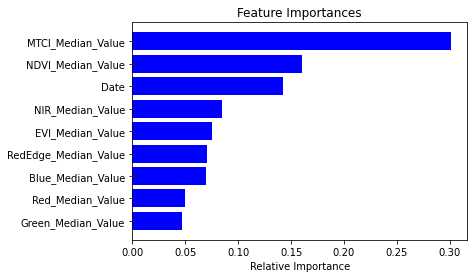

In [67]:

    
model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=4, n_jobs = -1)
model.fit(X_train, y_train)
# Finding feature importance
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)
# Running predictions
test_data_regression(model)
# Plotting feature importance
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [104]:
len(train_index)
X
X.values[train_index[:5]]

array([[ 2.72938032e-02,  6.79430515e-02,  9.65726748e-02,
         1.61287174e-01,  3.09786797e-01,  5.25267124e-01,
         2.37163234e+00, -3.61538509e-01,  7.37641000e+05],
       [ 2.98998551e-02,  7.12344423e-02,  1.03943747e-01,
         1.69822782e-01,  3.17893922e-01,  5.05842566e-01,
         2.34257638e+00, -3.49587799e-01,  7.37641000e+05],
       [ 2.60225385e-02,  6.04562461e-02,  1.03429928e-01,
         1.51176751e-01,  2.88286418e-01,  4.72149462e-01,
         2.97291493e+00, -3.02554934e-01,  7.37641000e+05],
       [ 3.18268165e-02,  7.07230642e-02,  1.19328972e-01,
         1.62536107e-01,  2.94983715e-01,  4.23091099e-01,
         3.14508975e+00, -2.64589489e-01,  7.37641000e+05],
       [ 2.92328708e-02,  7.05545470e-02,  9.48832668e-02,
         1.71998300e-01,  3.38923126e-01,  5.62266946e-01,
         2.21605098e+00, -4.20867803e-01,  7.37641000e+05]])

In [107]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
# print(kf)

scoresss = []
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=4, n_jobs = -1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)
    print(r2, ' r2_score')
    scoresss.append(r2)

0.2545573879449725  r2_score
-0.7861309344125582  r2_score
-0.5798863484484076  r2_score
0.505121085943314  r2_score
0.5669466980258646  r2_score
0.24435917883409475  r2_score
0.4173217008940737  r2_score
0.3401201010960351  r2_score
-0.6348543080366207  r2_score
0.3710952738450023  r2_score


In [108]:
sum(scoresss)/len(scoresss)

0.06986498356857704

In [88]:
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=4, n_jobs = -1)

# cross_val_score(model, X, y, cv=3, scoring='r2')

from sklearn.model_selection import cross_validate

scores = cross_validate(model, X, y, cv=2,
                        scoring=('neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'),
                        return_train_score=True)


In [89]:
scores
# plt.plot(scores['test_r2'])
# plt.plot(scores['train_r2'])

{'fit_time': array([0.95202041, 0.9011085 ]),
 'score_time': array([0.1218996 , 0.12305665]),
 'test_neg_mean_absolute_error': array([-80.61478055, -86.39473543]),
 'train_neg_mean_absolute_error': array([-21.18848764, -22.68860604]),
 'test_neg_mean_squared_error': array([-10643.74376863, -12219.28339782]),
 'train_neg_mean_squared_error': array([-727.98530467, -871.49736696]),
 'test_r2': array([-0.05686476, -0.21330711]),
 'train_r2': array([0.92771509, 0.91346514])}

In [64]:
%time

import time, datetime
from datetime import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')
comments.append('Test train split. test_Size=0.3, random_state=55')
cv = 10
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

#==============================================================================
# RandomForestRegressor
#==============================================================================
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
pipe = Pipeline(steps=[('model', model)])

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=4, n_jobs = -1)


# Number of trees in random forest
n_estimators = [1000]
# Number of features to consider at every split
# max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [250]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [4, 6, 8]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
             
             
# Create the random grid
param_grid = {
    'model__n_estimators': n_estimators,
#                'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
#                'model__min_samples_leaf': min_samples_leaf,
#                'model__bootstrap': bootstrap}
                }


estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

Wall time: 0 ns
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of  10 | elapsed:   10.5s remaining:   42.4s
[Parallel(n_jobs=6)]: Done   5 out of  10 | elapsed:   11.1s remaining:   11.1s
[Parallel(n_jobs=6)]: Done   8 out of  10 | elapsed:   17.3s remaining:    4.2s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   17.7s finished


-72.65301975651047
{'model__max_depth': 250, 'model__min_samples_split': 5, 'model__n_estimators': 1000}
Total time:  0.3900325973828634 minutes
neg_mean_absolute_error
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of  10 | elapsed:    8.6s remaining:   34.6s
[Parallel(n_jobs=6)]: Done   5 out of  10 | elapsed:    8.8s remaining:    8.8s
[Parallel(n_jobs=6)]: Done   8 out of  10 | elapsed:   16.7s remaining:    4.1s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   17.1s finished


-9094.293417799443
{'model__max_depth': 250, 'model__min_samples_split': 5, 'model__n_estimators': 1000}
Total time:  0.3956631978352865 minutes
neg_mean_squared_error
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of  10 | elapsed:   10.4s remaining:   41.9s
[Parallel(n_jobs=6)]: Done   5 out of  10 | elapsed:   10.6s remaining:   10.6s
[Parallel(n_jobs=6)]: Done   8 out of  10 | elapsed:   18.6s remaining:    4.6s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:   18.9s finished


0.06117357620930299
{'model__max_depth': 250, 'model__min_samples_split': 5, 'model__n_estimators': 1000}
Total time:  0.41302756865819296 minutes
r2


In [35]:
X.shape

(1344, 10)

In [ ]:
model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=0, n_jobs = -1)


# Using Permutation Importance

In [ ]:


# PERMUTATION

from sklearn.inspection import permutation_importance


result = permutation_importance(gs_xgb_fitted, X_test, y_test, n_repeats=100, random_state=0)

# ==================================
# Feature selection
# ===================================

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

# Plot importances
fig, ax = plt.subplots(figsize=(25, 25))
ind = indices = np.argsort(result.importances_mean)[::-1]
plt.barh(X_test.columns, result.importances_mean[ind])
plt.show()


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}
grid_search_rfc = GridSearchCV(rfc, param_grid = grid_values, scoring = scoring, refit='f1')
grid_search_rfc.fit(x_train, y_train)

grid_search_rfc.best_params_
grid_search_rfc.cv_results_

# cv_results[‘mean_test_<metric_name>’]
grid_search_rfc.cv_results_['mean_test_recall']
